**Описание данных**


Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока
все ещё тут».

**Задачи от заказчика:**


- Проанализировать ассортимент товаров;
- Провести исследовательский анализ данных;
- Выделить основной и дополнительный ассортимент; 
- Сформулировать и проверить статистические гипотезы.

***Ход исследования:***

Шаг 1. Изучение общей информации о датасете

Шаг 2. Подготовка данных 

- Преобразование данных в нужные типы;
- Создание новых столбцов;
- Обработка неявных дубликатов;
- Анализ выбросов и аномальных значений.

Шаг 3. Исследовательский анализ
- Временной диапазона продажи товаров;
- Оценка пользовательской активности (метрики DAU, WAU, MAU);
- Оценка средних значений;
- Анализ изменения вуручки и количества заказов во времени;
- Категоризация товарного ассортимента;
- Проведение АВС-анализа товаров;
- Анализ выручки по категориям товаров. Построение графиков количества заказов и количества покупателей по категориям;
- Кумулятивная выручка по категориям товаров;
- Сезонность продажи товаров.

Шаг 4. Статистический анализ
- Сравнение среднего чека заказа между сегментами покупателей;
- Сравнение выручки между сегментами покупателей;
- Сравнение категорий товаров по сумме выручки;
- Сравнение выручки от продаж по сезонам;
- Сравнение продаж в будни и выходные.


Шаг 5. Общий вывод и рекомендации

**Названия столбцов:**

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Шаг 1. Изучение общей информации о датасете

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
import re

# для полноценной работы со строками мы уберем ограничение строк и столбцов в отображении
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [3]:
def data_information(dataset):
    print('Первые строки таблицы:')
    print('*'*50)
    display(dataset.head())
    print('Информация о таблице:')
    print('*'*50)
    dataset.info()
    print('Количество явных дубликатов:')
    print('*'*50)
    display(dataset.duplicated().sum())

In [4]:
data_information(df)

Первые строки таблицы:
**************************************************


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Информация о таблице:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
Количество явных дубликатов:
**************************************************


0

In [5]:
# взглянем на количество уникальных товаров, покупателей и заказов в датасете
print('Количество уникальных товаров:', df['product'].nunique())
print('Количество уникальных покупателей:', df['customer_id'].nunique())
print('Количество уникальных заказов:', df['order_id'].nunique())

Количество уникальных товаров: 2343
Количество уникальных покупателей: 2451
Количество уникальных заказов: 3521


Первичные наблюдения:

- Всего в датасете 7474 строк и 6 столбцов;
- Пропуски в столбцах датасета отсутствуют;
- Названия столбцов в датасете имеют корректный вид;
- Явные дубликаты отсутствуют;
- Есть необходимость преобразовать данные в столбце `date`;
- Всего в датасете 2343 уникальных наименований товаров, 2451 уникальных покупателей и 3521 уникальных заказов.

## Шаг 2. Предобработка данных 

### Преобразование данных в нужные типы

Приведем столбец `date` к типу даты pandas:

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [7]:
# проверим изменение
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


### Создание дополнительных столбцов

In [8]:
# создадим столбец с общей выручкой
df['total_price'] = df['quantity'] * df['price']

In [9]:
# выделим в отдельные столбцы полную дату заказа, время, день, неделю, месяц и год.
df['order_date'] = df.date.dt.date
df['hour'] = df.date.dt.hour
df['day'] = (df.date.dt.dayofweek) + 1 
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year

Добавим столбцы с делением на будни и выходные дни:

In [10]:
# напишем функцию weekdays, принимающую номер дня от 1 до 5 и возвращающую будни, где 1 = да, 0 = нет.
def weekdays(day):
    if  1 <= day <= 5:
        return 1
    else:
        return 0
    
# функция weekends, принимающяя номер дня от 6 до 7 и возвращающую выходные, где 1 = да, 0 = нет.
def weekends(day):
    if  6 <= day <= 7:
        return 1
    else:
        return 0

In [11]:
# создадим отдельные столбцы будни/выходные в зависимости от дня
df['weekdays'] = df['day'].apply(weekdays)
df['weekends'] = df['day'].apply(weekends)

Создадим столбец, определяющий сезон:

In [12]:
# функция, которая определяет сезон в зависимости от номера месяца
def season(month):
    if  3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

In [13]:
# добавим новый столбец
df['season'] = df['month'].apply(season)
df.sample(10)

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
3028,2019-04-22 15:00:00,7f57dc7b-21a8-48bf-917d-6f2ac375ed87,71240,Искусственный цветок Букет Примулы пластиковая...,6,52.0,312.0,2019-04-22,15,1,17,4,2019,1,0,весна
2068,2019-02-28 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70507,Сушилка Meliconi Stendy Junior,1,5594.0,5594.0,2019-02-28,13,4,9,2,2019,1,0,зима
4444,2019-06-04 09:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,120.0,2019-06-04,9,2,23,6,2019,1,0,лето
835,2018-11-17 01:00:00,2c2b3410-8218-4671-a208-4d20ed55056a,69028,Муляж Мандарин оранжевый 8 см полиуретан,2,59.0,118.0,2018-11-17,1,6,46,11,2018,0,1,осень
4235,2019-06-01 20:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0,120.0,2019-06-01,20,6,22,6,2019,0,1,лето
1623,2019-01-28 21:00:00,1f9af411-ce8f-4bb8-ba54-28c032df23eb,70008,Гладильная доска НИКА BLUES 124х46 см 5757,1,2527.0,2527.0,2019-01-28,21,1,5,1,2019,1,0,зима
1752,2019-02-08 21:00:00,e9d89e1f-92e2-4f53-b9f3-d055a4ed8052,70172,Антуриум андрианум Пикассо голубой d-15 см,1,1522.0,1522.0,2019-02-08,21,5,6,2,2019,1,0,зима
2993,2019-04-21 11:00:00,5f6d318b-4ed0-4163-8767-2959bc2e6c76,14664,Рассада зелени для кухни Шпинат в кассете 6 шт,1,116.0,116.0,2019-04-21,11,7,16,4,2019,0,1,весна
6186,2019-08-26 11:00:00,f4aed8ad-2de2-4a76-bd0e-7d70f858cec0,72414,Лаванда в горшке d-15 см,1,412.0,412.0,2019-08-26,11,1,35,8,2019,1,0,лето
4420,2019-06-03 20:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,120.0,2019-06-03,20,1,23,6,2019,1,0,лето


### Поиск неявных дубликатов

Явные дубликаты в датасете отсутствуют. Проверим наличие строк с частичным дублированием в номере заказа, id пользователя и товарах в заказе. Отберем такие строки.

In [14]:
df[df.duplicated(subset = ['customer_id', 'order_id', 'product'])].head(10)

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-02,18,2,40,10,2018,1,0,осень
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-02,19,2,40,10,2018,1,0,осень
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-02,20,2,40,10,2018,1,0,осень
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-03,4,3,40,10,2018,1,0,осень
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0,1409.0,2018-10-04,13,4,40,10,2018,1,0,осень
126,2018-10-07 17:00:00,ce0e0c29-8c8b-4714-84bd-80957224d4cf,68557,Сумка-тележка хозяйственная Gimi Market синяя,1,1874.0,1874.0,2018-10-07,17,7,40,10,2018,0,1,осень
147,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekk...",1,209.0,209.0,2018-10-08,19,1,41,10,2018,1,0,осень
148,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0,194.0,2018-10-08,19,1,41,10,2018,1,0,осень
149,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 20,0 л пищевой (Минеральные ...",1,277.0,277.0,2018-10-08,19,1,41,10,2018,1,0,осень
150,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,239.0,2018-10-08,19,1,41,10,2018,1,0,осень


In [15]:
df[df['order_id'] == 68474].head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
19,2018-10-01 21:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-01,21,1,40,10,2018,1,0,осень
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-02,18,2,40,10,2018,1,0,осень
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-02,19,2,40,10,2018,1,0,осень
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-02,20,2,40,10,2018,1,0,осень
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10-03,4,3,40,10,2018,1,0,осень


В датасете присутствуют идентичные строки, которые отличаются лишь временем заказа. Количество таких дубликатов состаляет около 25% датасета. Ситуация такая, что процент удаленных данных будет велик, но такие дубликаты необходимо удалить для получения ясной картины о продажах.

In [16]:
# удалим дубликаты оставив последнюю строку и перепроверим
df.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='last', inplace=True)
df[df.duplicated(subset = ['customer_id', 'order_id', 'product'], keep=False)]

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5588 entries, 0 to 7473
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5588 non-null   datetime64[ns]
 1   customer_id  5588 non-null   object        
 2   order_id     5588 non-null   int64         
 3   product      5588 non-null   object        
 4   quantity     5588 non-null   int64         
 5   price        5588 non-null   float64       
 6   total_price  5588 non-null   float64       
 7   order_date   5588 non-null   object        
 8   hour         5588 non-null   int64         
 9   day          5588 non-null   int64         
 10  week         5588 non-null   UInt32        
 11  month        5588 non-null   int64         
 12  year         5588 non-null   int64         
 13  weekdays     5588 non-null   int64         
 14  weekends     5588 non-null   int64         
 15  season       5588 non-null   object        
dtypes: UIn

**Осуществим проверку данных и исключим ситуацию, когда на один заказ приходится больше одного покупателя.**

In [18]:
#количество уникальных клиентов на один заказ
customer_er = df.groupby('order_id').agg({'customer_id' : 'nunique'}).query('customer_id > 1')
customer_er 

,customer_id
order_id,
14872,2
68785,2
69283,2
69310,2
69345,2
69410,2
69485,3
69531,2
69833,2


In [19]:
print('Количество уникальных заказов на несколько пользователей:',customer_er.shape[0])

Количество уникальных заказов на несколько пользователей: 29


Вероятно, при загрузке данных произошла ошибка. Удалим эти строки.

In [20]:
df = df.query('order_id not in @customer_er.index')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5522 entries, 0 to 7473
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5522 non-null   datetime64[ns]
 1   customer_id  5522 non-null   object        
 2   order_id     5522 non-null   int64         
 3   product      5522 non-null   object        
 4   quantity     5522 non-null   int64         
 5   price        5522 non-null   float64       
 6   total_price  5522 non-null   float64       
 7   order_date   5522 non-null   object        
 8   hour         5522 non-null   int64         
 9   day          5522 non-null   int64         
 10  week         5522 non-null   UInt32        
 11  month        5522 non-null   int64         
 12  year         5522 non-null   int64         
 13  weekdays     5522 non-null   int64         
 14  weekends     5522 non-null   int64         
 15  season       5522 non-null   object        
dtypes: UIn

In [22]:
# проверим остались ли уникальные номера заказов с разными датами
orders = df.groupby('order_id').agg({'order_date':'nunique'}).query('order_date > 1').sort_values(by='order_date', ascending=False)
orders

,order_date
order_id,
68760,3
14500,2
14541,2
68814,2
69527,2
69750,2
69807,2
70186,2
70318,2


In [23]:
print('Уникальные заказы с разными датами:', orders.shape[0])

Уникальные заказы с разными датами: 12


In [24]:
# рассмотрим подробнее один из таких заказов
df[df['order_id'] == 68760].head(10)

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
416,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Вешалка деревянная с расширенными плечиками и ...,8,262.0,2096.0,2018-10-26,13,5,43,10,2018,1,0,осень
418,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Вешалка с закругленными плечиками без переклад...,7,106.0,742.0,2018-10-26,13,5,43,10,2018,1,0,осень
423,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"Короб стеллажный с крышкой большой, 30*40*25 с...",1,674.0,674.0,2018-10-26,13,5,43,10,2018,1,0,осень
424,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"Короб стеллажный с крышкой малый, 28*30*16 см,...",3,524.0,1572.0,2018-10-26,13,5,43,10,2018,1,0,осень
427,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Набор вешалок мягких тканевых с перекладиной 3...,2,277.0,554.0,2018-10-26,13,5,43,10,2018,1,0,осень
435,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"Швабра САЛЬСА треугольная МИНИ, Y8110",1,524.0,524.0,2018-10-26,13,5,43,10,2018,1,0,осень
463,2018-10-27 23:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Гладильная доска Sarayli Tamara 125x42 см,1,3074.0,3074.0,2018-10-27,23,6,43,10,2018,0,1,осень
515,2018-10-29 17:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Вешалка для блузок 41 см черный Attribute AHM791,9,50.0,450.0,2018-10-29,17,1,44,10,2018,1,0,осень
516,2018-10-29 17:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Коврик влаговпитывающий ребристый 50х80 см Ста...,1,299.0,299.0,2018-10-29,17,1,44,10,2018,1,0,осень
517,2018-10-29 17:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Коврик влаговпитывающий ребристый 60х90 см Ста...,1,412.0,412.0,2018-10-29,17,1,44,10,2018,1,0,осень


Как мы видим в таком заказе повторяется дата и номер заказа, набор товарных наименований различается. Посмотрим на количество продуктов в таких заказах.

In [25]:
df.groupby('order_id').agg(
    {'order_date':'nunique', 'product':'count'}).query('order_date > 1').sort_values(by='order_date', ascending=False)

,order_date,product
order_id,,
68760,3,21
14500,2,10
14541,2,7
68814,2,2
69527,2,2
69750,2,2
69807,2,2
70186,2,2
70318,2,2


Таким образом, у нас осталось 12 уникальных заказов, в которых не повторяются товары. Можно предположить причины: изначально для доставки был оформлен неполный заказ и спустя время покупатель его изменил/дополнил или же транзакции занимали некоторое время, поэтому в дасете эти покупки имеют разное время.

### Анализ выбросов и аномальных значений

#### Столбец `quantity`

In [26]:
df['quantity'].describe()

count    5522.000000
mean        2.579500
std        16.505923
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

Мы видим большой разброс в количестве товара (минимум 1 шт., максимум 1 000 шт.). При этом большинство клиентов покупает товар в количестве 1 шт.

In [27]:
# найдем 99-й перцентиль
percentile = np.percentile(df['quantity'], [99]) # граница аномальных значений в кол-ве товара в заказе
print(f"99-й перцентиль количества товаров в заказе: {percentile}") 

99-й перцентиль количества товаров в заказе: [25.]


Таким образом, в логе не более 1% товаров в количестве больше 25.

Самостоятельно определим границу количества товаров в заказе равной 50-ти. Так как 30-50 шт. семян или дверных крепежей/пружин допустимые и нормальные заказы для целей садоводства и ремонта, их могут покупать в розницу большими партиями.

In [28]:
abnormal_quantity = df.groupby('order_id', as_index=False)\
.agg({'quantity': 'sum'}).query('quantity > 50').sort_values(by='quantity', ascending=False)

abnormal_quantity.head(10)

,order_id,quantity
2021,71743,1000
1984,71668,334
1893,71478,300
404,68611,300
797,69289,200
532,68815,170
1583,70841,150
540,68831,140
720,69156,101
2607,72885,100


In [29]:
print(f"Количество строк с аномальными значениями: {abnormal_quantity['quantity'].count()}") 

Количество строк с аномальными значениями: 27


In [30]:
# посмотрим, что это за товары
df.query('quantity > 50')['product'].unique()

array(['Крючок одежный 2-х рожковый серый металлик с полимерным покрытием *Тонар*, 1110027',
       'Стяжка оконная с болтом СТ-55 цинк, 1108354',
       'Крепеж для пружины дверной, 1107055',
       'Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014',
       'Муляж ЯБЛОКО 9 см красное',
       'Набор ножей Attribute CHEF 5 предметов AKF522',
       'Щетка для посуды *ОЛЯ*, Мультипласт 1807010',
       'Ручка-скоба РС-100 белая *Трибатрон*, 1108035',
       'Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ',
       'Щетка для мытья посуды КОЛИБРИ М5202 большая',
       'Плечики пластмассовые Размер 52 - 54 Тула 1205158',
       'Ковш пластмассовый Полимербыт С215, 1,5 л 1406006',
       'Салфетка Protec Textil Polyline 30х43 см Аметист белая 6230',
       'Насадка на валик ВММ-200/60 белый искусственный мех, 0703011',
       'Вешалки мягкие для деликатных вещей 3 шт шоколад',
       'Вантуз с деревянной ручкой d14 см красный, Bur

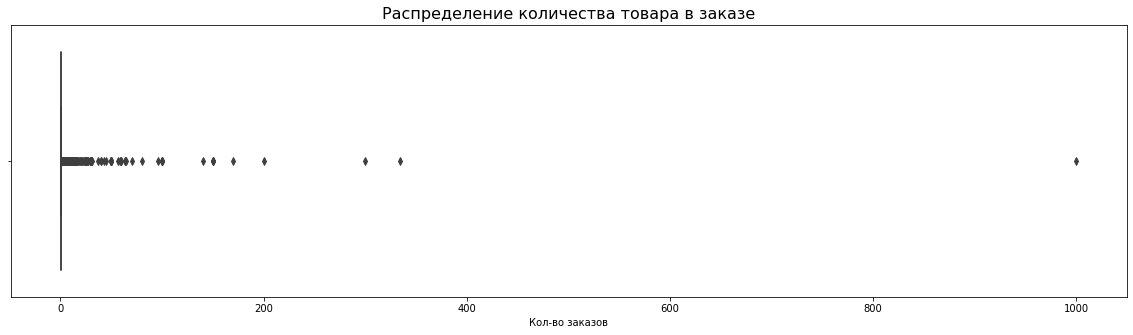

In [31]:
plt.figure(figsize=(20,5))
sns.boxplot(x='quantity', data=df) # построим боксплот
plt.title('Распределение количества товара в заказе', fontsize=16)
plt.xlabel('Кол-во заказов')
plt.show()

Рассмотрим некоторые заказы

In [32]:
df[df['order_id'] == 68611]

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0,2850.0,2018-10-16,8,2,42,10,2018,1,0,осень
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0,5700.0,2018-10-16,8,2,42,10,2018,1,0,осень


In [33]:
df[df['order_id'] == 14835]

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
4861,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,Бакопа ампельная махровая белая махровая объем...,1,90.0,90.0,2019-06-08,8,6,23,6,2019,0,1,лето
4862,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,Бакопа ампельная махровая сиреневая махровая о...,1,90.0,90.0,2019-06-08,8,6,23,6,2019,0,1,лето
4863,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,Бакопа ампельная махровая фиолетовая махровая ...,1,90.0,90.0,2019-06-08,8,6,23,6,2019,0,1,лето
4864,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,"Бакопа ампельная мега-крупная белая объем 0,5 л",1,90.0,90.0,2019-06-08,8,6,23,6,2019,0,1,лето
4865,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,"Бакопа ампельная мега-крупная розовая объем 0,5 л",1,90.0,90.0,2019-06-08,8,6,23,6,2019,0,1,лето
4866,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,"Бакопа ампельная мега-крупная синяя объем 0,5 л",1,90.0,90.0,2019-06-08,8,6,23,6,2019,0,1,лето
4867,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,Бакопа ампельная мега-крупная сиреневая объем ...,1,90.0,90.0,2019-06-08,8,6,23,6,2019,0,1,лето
4868,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,"Бакопа ампельная, диам. 12 см",1,142.0,142.0,2019-06-08,8,6,23,6,2019,0,1,лето
4869,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,"Барвинок синий объем 0,5 л",1,105.0,105.0,2019-06-08,8,6,23,6,2019,0,1,лето
4870,2019-06-08 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,Вербейник монетчатый желты,1,105.0,105.0,2019-06-08,8,6,23,6,2019,0,1,лето


Интернет-магазин осуществляет продажу товаров на розничной основе, продажу товаров в количестве больше 50 на одного покупателя можно считать уже оптовой покупкой, поэтому примем решение удалить такие строки из сырых данных.

In [34]:
df = df.query('quantity <= 50').reset_index(drop=True)

#### Столбец `price`

In [35]:
df['price'].describe()

count     5499.000000
mean       533.336804
std        976.853149
min          9.000000
25%         90.000000
50%        150.000000
75%        524.000000
max      14917.000000
Name: price, dtype: float64

Разброс по ценам товаров также достаточно большой (минимум 9 у.е. максимум составляет 14 917 у.е.). При этом большинство клиентов покупает товар в пределах до 530 у.е. 

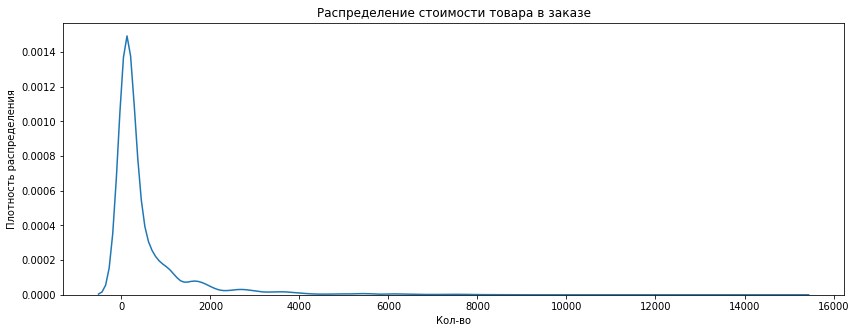

In [36]:
plt.figure(figsize=(14,5))

sns.kdeplot(data=df, x='price')
plt.xlabel('Кол-во')
plt.ylabel('Плотность распределения')
plt.title('Распределение стоимости товара в заказе')
plt.show()

Основное число товаров имеет небольшее значение стоимости. Свыше этого значения есть "выбросы". Посмортим, что за товары продаются за цену дороже 12 000 у.е.

In [37]:
df.query('price > 12000')['product'].unique()

array(['Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая'],
      dtype=object)

Можно считать, что это вполне адекватная цена за данный продукт.

#### Столбец ` customer_id`. Поиск аномальных покупателей.

In [38]:
print(f"Количество покупателей: {df['customer_id'].nunique()}") 

Количество покупателей: 2394


Посмотрим на число заказов по пользователям 

In [39]:
orders_by_customers = df.groupby('customer_id', as_index=False).agg({'order_id': 'nunique'})
orders_by_customers.columns = ['customer_id', 'orders']

orders_by_customers.sort_values(by='orders', ascending=False).head(10)

,customer_id,orders
1870,c971fb21-d54c-4134-938f-16b62ee86d3b,125
724,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1071,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1705,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
1775,bea7a833-2074-42db-bc49-4457abd3c930,4
2092,e0535076-6270-4df2-8621-cb06264a94fa,4
108,0adba506-249c-40b5-839d-a59d7a275cd7,3
977,6a86cc77-ef15-496f-b5d3-89005597ee5d,3
783,552e17df-ba16-4e66-84fb-55a5557a6bea,3


Построим точечный график количества заказов по пользователям чтобы увидеть выбросы

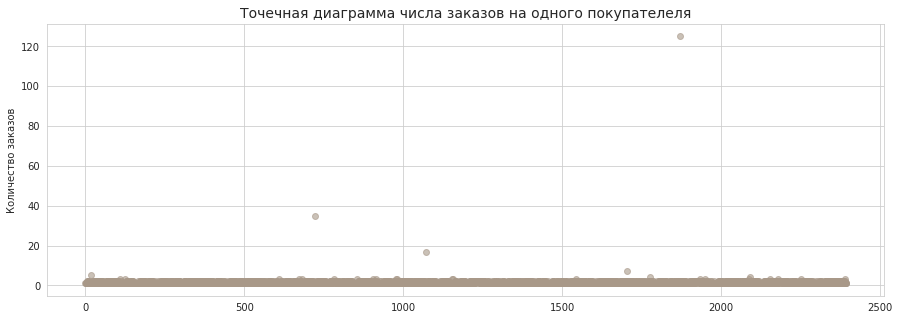

In [40]:
x_values = pd.Series(range(0, len(orders_by_customers)))

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders_by_customers['orders'], color='#a89888', alpha = 0.6)   
plt.ylabel('Количество заказов')
plt.title('Точечная диаграмма числа заказов на одного покупателеля', fontsize=14)
plt.show()

In [41]:
# Посчитаем 95-й и 99-й перцентили количества заказов по покупателелям
percentile = np.percentile(orders_by_customers['orders'], [95, 99])

print(f"95-й перцентиль количества заказов на покупателя: {percentile[0]}") 
print(f"99-й перцентиль количества заказов на покупателя: {percentile[1]}") 

95-й перцентиль количества заказов на покупателя: 2.0
99-й перцентиль количества заказов на покупателя: 3.0


Не более 5% количества заказов на покупателя больше 2, и не более 1% больше 3.

In [42]:
# Узнаем, сколько всего покупателей с большим количеством заказов
big_customers = orders_by_customers[orders_by_customers['orders'] > 3]['customer_id'].reset_index(drop=True)

print(f"Всего покупателей с большим количеством заказов: {len(big_customers)}")

Всего покупателей с большим количеством заказов: 7


In [43]:
# посмотрим, что покупают постоянные покупатели
df[df['customer_id'] == '73d1cd35-5e5f-4629-8cf2-3fda829d4e58']

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
4567,2019-10-02 15:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72836,Чайник электрический ВАСИЛИСА Т31-2000 нержаве...,1,704.0,704.0,2019-10-02,15,3,40,10,2019,1,0,осень
4592,2019-10-07 09:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72881,Хризантема сиреневая d-18 см,1,187.0,187.0,2019-10-07,9,1,41,10,2019,1,0,осень
4593,2019-10-07 10:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72883,"Кипятильник электрический 2.5 КВт, 1601143",1,224.0,224.0,2019-10-07,10,1,41,10,2019,1,0,осень
4595,2019-10-07 16:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72889,Чайник электрический ВАСИЛИСА Т28-1800 нержаве...,1,749.0,749.0,2019-10-07,16,1,41,10,2019,1,0,осень
4619,2019-10-10 10:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72913,Стремянка COLOMBO FACTOTUM 4 ступени стальная ...,1,2849.0,2849.0,2019-10-10,10,4,41,10,2019,1,0,осень
4654,2019-10-15 09:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72967,Тележка багажная DELTA DT-22 синий грузоподъем...,1,674.0,674.0,2019-10-15,9,2,42,10,2019,1,0,осень
4669,2019-10-16 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72983,Сумка-тележка хозяйственная GIMI Ideal синяя,1,1649.0,1649.0,2019-10-16,11,3,42,10,2019,1,0,осень
4670,2019-10-16 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72986,Сумка-тележка хозяйственная Rolser MNB012 azul...,1,6600.0,6600.0,2019-10-16,11,3,42,10,2019,1,0,осень
4675,2019-10-16 16:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72993,"Таз пластмассовый 30,0 л овальный ПЦ2913, 1404051",1,404.0,404.0,2019-10-16,16,3,42,10,2019,1,0,осень
4676,2019-10-16 17:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72996,Контейнер для мусора FLIP BIN CURVER 25 л граф...,1,824.0,824.0,2019-10-16,17,3,42,10,2019,1,0,осень


Посмотрев на историю покупок одного из таких покупателей, мы видим, что он делает заказ по одному разному товару несколько раз в день, что не совсем типично, но вполне допустимо, ведь у нас интернет-магазин. Для последующего анализа такие крупные покупатели будут давать аномально большой объем продаж и искажать выводы. Поэтому ввиду малочисленности аномальных значений, удалим их из датафрейма.

In [44]:
df = df.query('customer_id not in @big_customers')

In [45]:
# перепроверим количество после удаления
df['customer_id'].nunique()

2387

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 5498
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5229 non-null   datetime64[ns]
 1   customer_id  5229 non-null   object        
 2   order_id     5229 non-null   int64         
 3   product      5229 non-null   object        
 4   quantity     5229 non-null   int64         
 5   price        5229 non-null   float64       
 6   total_price  5229 non-null   float64       
 7   order_date   5229 non-null   object        
 8   hour         5229 non-null   int64         
 9   day          5229 non-null   int64         
 10  week         5229 non-null   UInt32        
 11  month        5229 non-null   int64         
 12  year         5229 non-null   int64         
 13  weekdays     5229 non-null   int64         
 14  weekends     5229 non-null   int64         
 15  season       5229 non-null   object        
dtypes: UIn

В результате предобработки:

- Были удалены неявные дубликаты;
- Столбец `date` приведен к типу datetime;
- Были добавлены стлобцы `total_price`, `order_date`, `hour`, `day`, `week`, `month`, `year`, `weekdays`, `weekends`, `season`;
- В столбце `quantity` были удалены аномально большие значения  в количестве товара;
- В столбце ` customer_id` были удалены аномально крупные покупатели;
- Теперь в датасете содержится 5229 строк.

## Шаг 3. Исследовательский анализ

### Анализ временного диапазона продажи товаров

In [47]:
# определим минимальную и максимальную дату cовершения транзакций
print('Минимальная дата:', df['date'].min())
print('Максимальная дата:', df['date'].max())

Минимальная дата: 2018-10-01 00:00:00
Максимальная дата: 2020-01-31 15:00:00


В датасете представлены данные с ноября 2018 г. по январь 2020 г. 

Посмотрим на динамику заказов, чтобы определить как меняется интенсивность спроса во времени.

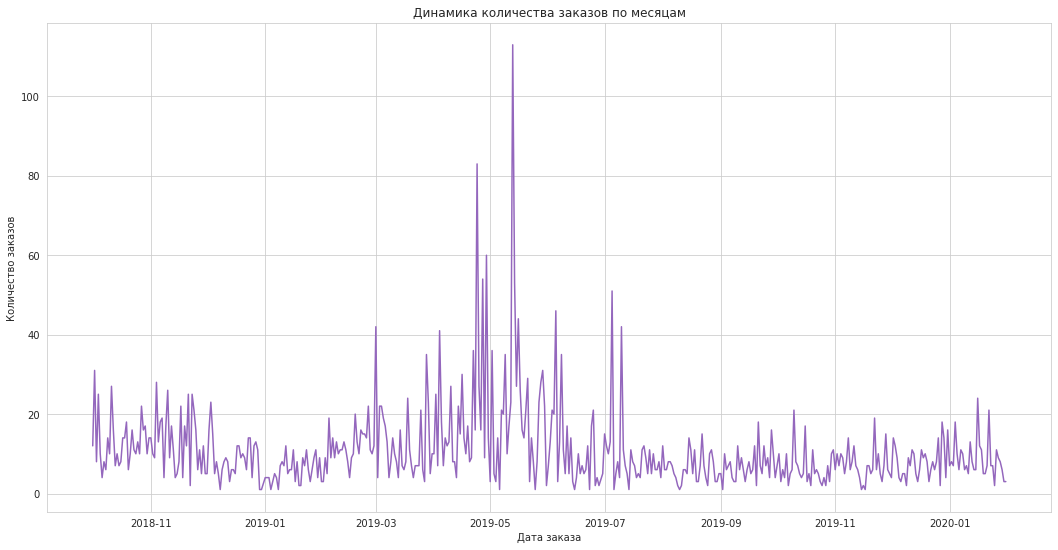

In [48]:
ax=df.pivot_table(index = 'order_date', 
                 values='order_id', 
                 aggfunc='count')\
.plot(grid=True, style = '-', figsize=(18, 9), legend=False, color='C14')
plt.title('Динамика количества заказов по месяцам')
plt.xlabel('Дата заказа')
plt.ylabel('Количество заказов')
plt.show()

Пик продаж приходится на май-июнь 2019 года. Учитывая, что в каждом заказе может быть несколько наименований, посмотрим на динамику количества уникальных заказов.

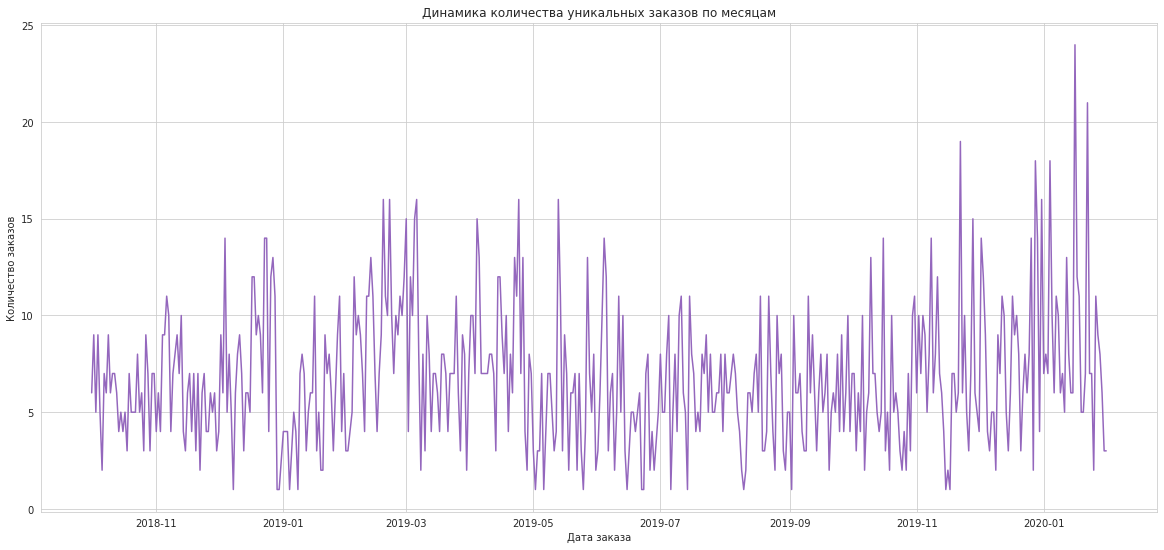

In [49]:
ax=df.pivot_table(index = 'order_date', 
                 values='order_id', 
                 aggfunc='nunique')\
.plot(grid=True, style = '-', figsize=(20, 9), legend=False, color='C14')
plt.title('Динамика количества уникальных заказов по месяцам')
plt.xlabel('Дата заказа')
plt.ylabel('Количество заказов')
plt.show()

Статистика по уникальным заказам показывает, что пик активности приходится на декабрь и февраль 2020 года, средние отметки на графике мы видим с февраля по май 2019 года, минимальные значения график показывает с начала лета и до сентября 2019 года. Начиная с осени 2019 г. количество заказов идет вверх.

Сравнивая с предыдущим графиком, можно предположить, что заказы, совершенные весной-летом более крупные и насчитывают большее число торговых наименований, тогда как зимой и осенью покупают часто, но меньше по объему.

### Оценка пользовательской активности

Рассмотрим количество уникальных активных пользователей за временные промежутки:
- DAU — количество уникальных пользователей в день;
- WAU — количество уникальных пользователей в неделю;
- MAU — количество уникальных пользователей в месяц.

In [50]:
# Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее.
dau = df.groupby('order_date').agg({'customer_id': 'nunique'}).mean()
wau = df.groupby(['year', 'week']).agg({'customer_id': 'nunique'}).mean()
mau = df.groupby(['year', 'month']).agg({'customer_id': 'nunique'}).mean()

print(f"Среднее количество уникальных покупателей за день: {int(dau)} человек")
print(f"Среднее количество уникальных покупателей за неделю: {int(wau)} человек")
print(f"Среднее количество уникальных покупателей за месяц: {int(mau)} человек")

Среднее количество уникальных покупателей за день: 6 человек
Среднее количество уникальных покупателей за неделю: 45 человек
Среднее количество уникальных покупателей за месяц: 196 человек


In [51]:
# дополнительно посчитаем метрику sticky factor, которая отражает регулярность использования сервиса
sticky_wau = (dau / wau) * 100
sticky_mau = (dau / mau) * 100
print(f"Недельная аудитория: {round(sticky_wau[0],2)} %")
print(f"Месячная аудитория: {round(sticky_mau[0],2)} %")

Недельная аудитория: 14.57 %
Месячная аудитория: 3.37 %


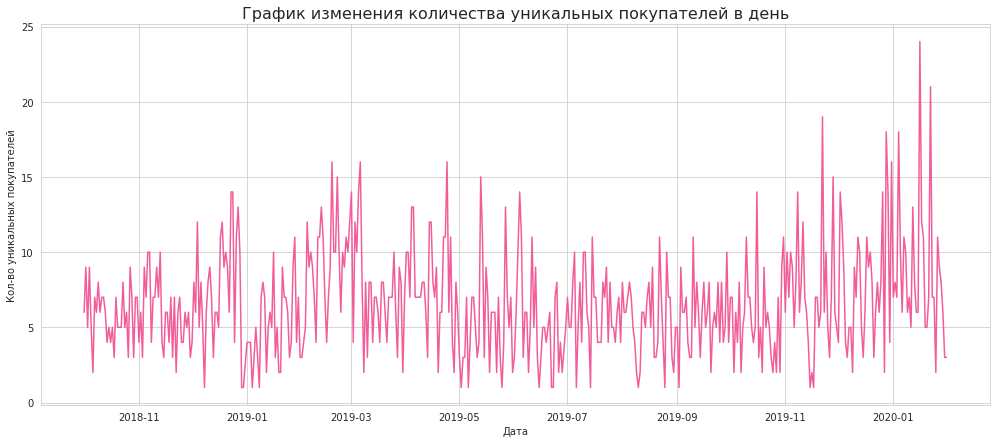

In [52]:
# график по изменению DAU во времени.
df.groupby(['order_date']).agg({'customer_id': 'nunique'}) \
         .plot(figsize=(17,7), grid=True, legend=False, color='#f25d99')
plt.title('График изменения количества уникальных покупателей в день', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

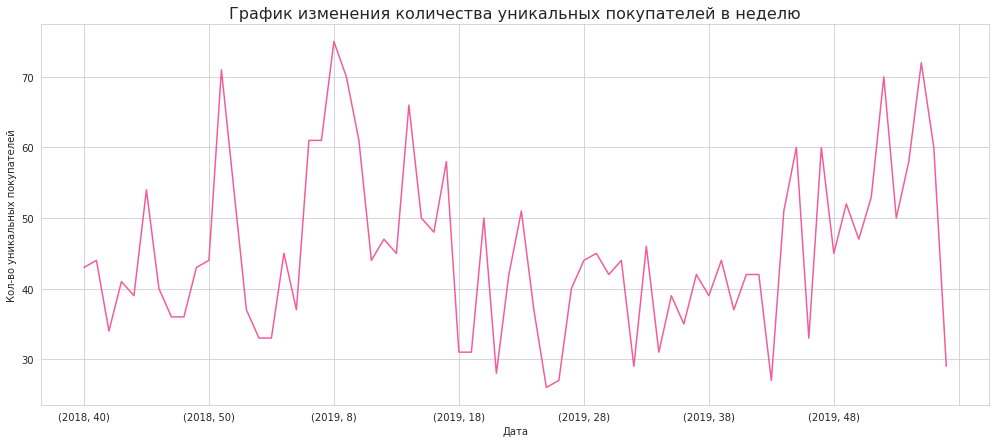

In [53]:
# график по изменению WAU во времени.
df.groupby(['year', 'week']).agg({'customer_id': 'nunique'}) \
         .plot(figsize=(17,7), grid=True, legend=False, color='#f25d99')
plt.title('График изменения количества уникальных покупателей в неделю', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

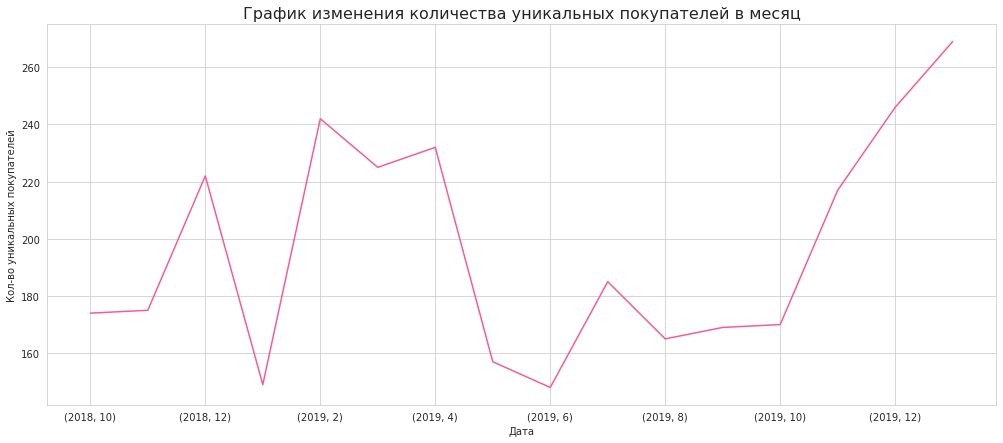

In [54]:
# График по изменению MAU во времени.
df.groupby(['year', 'month']).agg({'customer_id': 'nunique'}) \
         .plot(figsize=(17,7), grid=True, legend=False, color='#f25d99')
plt.title('График изменения количества уникальных покупателей в месяц', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

**Вывод:**
- Среднее количество уникальных покупателей за день: 6 человек
- Среднее количество уникальных покупателей за неделю: 45 человек
- Среднее количество уникальных покупателей за месяц: 196 человек
- Недельная аудитория интернет-магазина: 14,6 %;
- Месячная аудитория интернет-магазина: 3.4 %.


Анализ количества уникальных покупателей за день/неделю/месяц показывает, что интернет-магазин посещают не так часто.
На графиках можно увидеть падение месячной пользовательской активности в начале 2019 г., затем рост с февраля по май и снова падение в июне 2019 г. К концу 2019 г. пользователская активность снова идет вверх.

### Анализ средних значений

In [55]:
# сгруппируем датасет по заказам
orders = df.groupby(['customer_id', 'order_id']) \
            .agg({'total_price':'sum', 'price':'mean', 'product':'count', 'quantity':'sum', 'date':'first'}) \
            .rename(columns={'total_price':'order_price', 'price':'avg_price_of_product', 'product':'product_name_in_order', 'quantity':'products_in_order'})\
            .reset_index()
orders.head(10)

,customer_id,order_id,order_price,avg_price_of_product,product_name_in_order,products_in_order,date
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0,138.75,4,4,2019-10-16 08:00:00
1,001cee7f-0b29-4716-b202-0042213ab038,70290,442.0,442.00,1,1,2019-02-16 11:00:00
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,914.0,457.00,1,2,2019-10-14 23:00:00
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0,1649.00,1,1,2019-01-27 17:00:00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,2324.0,1162.00,1,2,2019-09-29 17:00:00
5,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,69987,1536.0,128.00,1,12,2019-01-27 12:00:00
6,005ba170-45e8-42de-93f7-192481ae2659,68803,1199.0,1199.00,1,1,2018-10-30 20:00:00
7,005ba170-45e8-42de-93f7-192481ae2659,105120,6658.0,3329.00,1,2,2019-11-05 21:00:00
8,00bd74b1-2792-47db-a2f1-680a09ac5026,68706,937.0,937.00,1,1,2018-10-21 05:00:00
9,00c0f92a-121a-4883-a78d-2c7b5fe187de,70418,134.0,134.00,1,1,2019-02-23 16:00:00


In [56]:
# сгруппируем датасет по пользователям
customers=orders.groupby('customer_id').agg({'order_id':'nunique',
                                             'order_price':['sum', 'mean'], 
                                             'avg_price_of_product':'mean', 
                                             'product_name_in_order':'mean', 
                                             'products_in_order':'mean'}) 
customers.columns = ['orders', 'total_revenue', 'avg_order_price', 'avg_price_of_product', 'avg_product_name_in_order', 'avg_products_in_order']
customers.head(10)

,orders,total_revenue,avg_order_price,avg_price_of_product,avg_product_name_in_order,avg_products_in_order
customer_id,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,138.75,4.0,4.0
001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,442.00,1.0,1.0
00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,457.00,1.0,2.0
002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1649.00,1.0,1.0
003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1162.00,1.0,2.0
004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1,1536.0,1536.0,128.00,1.0,12.0
005ba170-45e8-42de-93f7-192481ae2659,2,7857.0,3928.5,2264.00,1.0,1.5
00bd74b1-2792-47db-a2f1-680a09ac5026,1,937.0,937.0,937.00,1.0,1.0
00c0f92a-121a-4883-a78d-2c7b5fe187de,2,321.0,160.5,160.50,1.0,1.0


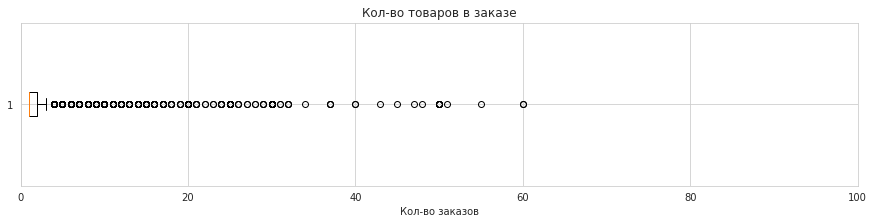

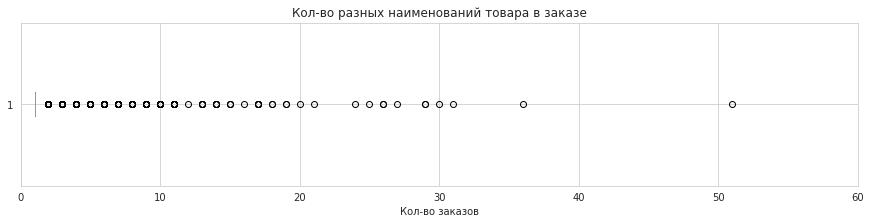

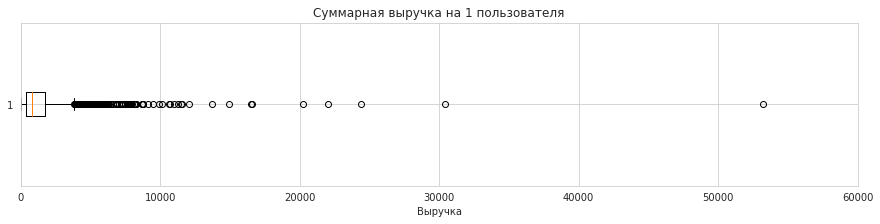

In [57]:
# построим боксплоты

plt.figure(figsize=(15,3))
plt.title('Кол-во товаров в заказе')
plt.boxplot(orders['products_in_order'], vert=False)
plt.xlabel('Кол-во заказов')
plt.xlim(0,100)
plt.show()


plt.figure(figsize=(15,3))
plt.title('Кол-во разных наименований товара в заказе')
plt.boxplot(orders['product_name_in_order'], vert=False)
plt.xlabel('Кол-во заказов')
plt.xlim(0,60)
plt.show()


plt.figure(figsize=(15,3))
plt.title('Суммарная выручка на 1 пользователя')
plt.boxplot(customers['total_revenue'], vert=False)
plt.xlim(0,60000)
plt.xlabel('Выручка')
plt.show()


In [58]:
print(f"Количество покупателей: {df['customer_id'].nunique()}") 
print(f"Количество заказов: {df['order_id'].nunique()}") 
print(f"Средняя выручка с покупателя: {customers['total_revenue'].median():.1f}") 
print(f"Средняя сумма заказа: {customers['avg_order_price'].median():.1f}") 
print(f"Среднее количество заказов на одного покупателя: {customers['orders'].median()}") 
print(f"Средняя стоимость продукта в заказе: {customers['avg_price_of_product'].median():.1f}") 
print(f"Среднее кол-во наименований товара в заказе: {customers['avg_product_name_in_order'].median()}") 
print(f"Среднее кол-во единиц товара в заказе: {customers['avg_products_in_order'].median()}") 

Количество покупателей: 2387
Количество заказов: 3274
Средняя выручка с покупателя: 824.0
Средняя сумма заказа: 637.0
Среднее количество заказов на одного покупателя: 1.0
Средняя стоимость продукта в заказе: 346.5
Среднее кол-во наименований товара в заказе: 1.0
Среднее кол-во единиц товара в заказе: 1.0


In [59]:
customers.describe()

,orders,total_revenue,avg_order_price,avg_price_of_product,avg_product_name_in_order,avg_products_in_order
count,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000
mean,1.371596,1450.094435,1102.045926,720.944175,1.750524,3.511591
std,0.501212,2193.333088,1573.381892,1031.410196,2.906539,6.299668
min,1.000000,15.000000,15.000000,14.000000,1.000000,1.000000
25%,1.000000,389.000000,300.000000,135.000000,1.000000,1.000000
50%,1.000000,824.000000,637.000000,346.500000,1.000000,1.000000
75%,2.000000,1770.000000,1308.250000,908.750000,1.000000,3.000000
max,3.000000,53232.000000,26616.000000,14917.000000,51.000000,60.000000


**Вывод:**
- Количество покупателей: 2387;
- Количество заказов: 3274;
- Покупатели, как правило, совершают разовые покупки и по одному наименованию товара в количестве 1-3 штуки;
- Средняя выручка с одного покупателя составляет 824 у.е.;
- Средняя сумма заказа: 637 у.е.;
- Средняя стоимость продукта в заказе: 346 у.е.

### Изменение количества заказов во времени

Построим графики и ответим на вопросы в какие часы/дни/месяцы пользователи покупают больше или меньше.

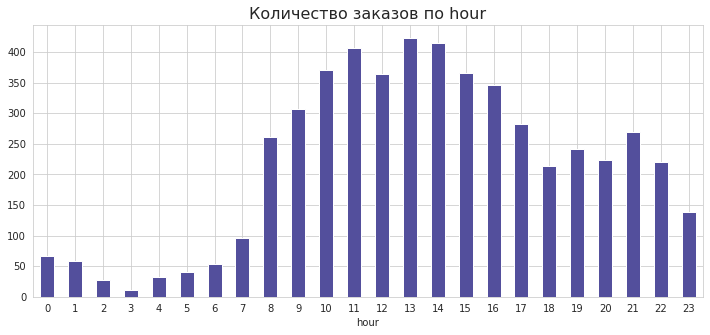

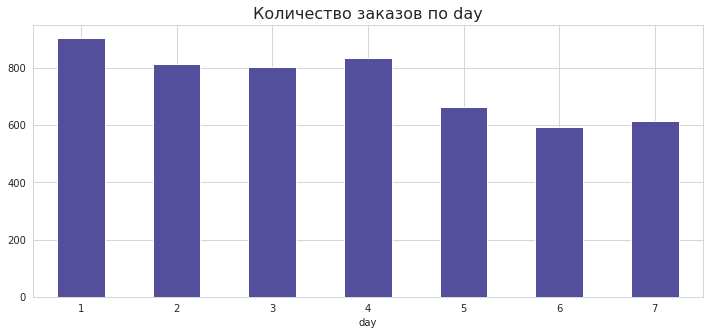

In [60]:
# создадим цикл для построения графиков
for columns in ['hour', 'day']:
    df.pivot_table(index = columns, values = 'order_id', aggfunc='count', fill_value=0)\
    .plot.bar(figsize=(12, 5), grid=True, y=['order_id'], color='#534f9c', fontsize=10, legend=False)
    plt.title('Количество заказов по ' + columns, fontsize=16)
    plt.xticks(rotation=0)
plt.show()

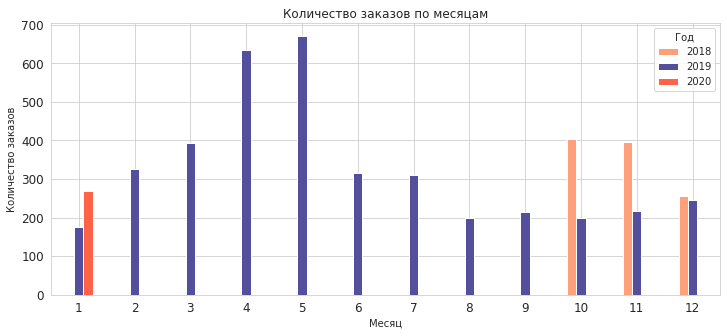

In [61]:
df.pivot_table(index='month', columns='year', values='order_id', aggfunc='count', fill_value=0)\
.plot.bar(figsize=(12, 5), grid=True, fontsize=12, legend=True, color=['#FFA07A', '#534f9c', '#FF6347'])
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend(title='Год') 
plt.xticks(rotation=0)
plt.show()

**Вывод:**
- Покупатели, как правило, оформляют заказы с 8:00 до 22:00, пик приходится на 13:00-14:00, после 23:00 совершают покупки крайне редко;
- Покупки чаще совершаются в первой половине недели, реже на выходных;
- Самые активные месяцы - апрель/май, люди делают покупки для сада-огорода перед летним сезоном. С июня по сентябрь спрос минимален. Показатели спроса в октябре-ноябре 2018 г. были выше почти в два раза, чем показатели 2019 года.

### Изменение выручки во времени

In [62]:
# найдем общую сумму выручки за весь период
revenue_sum = df['total_price'].sum()
print(f"Общая сумма выручки интернет-магазина: {revenue_sum:.2f} у.е.") 

Общая сумма выручки интернет-магазина: 3461375.42 у.е.


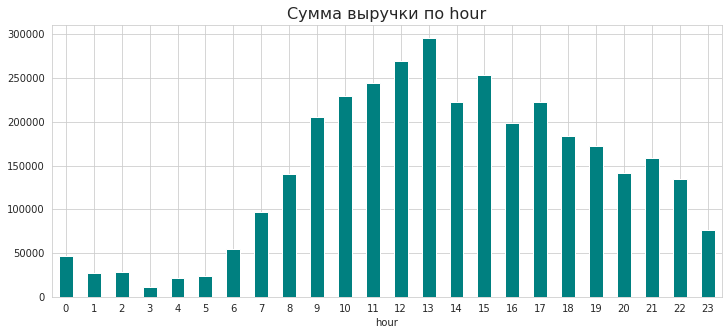

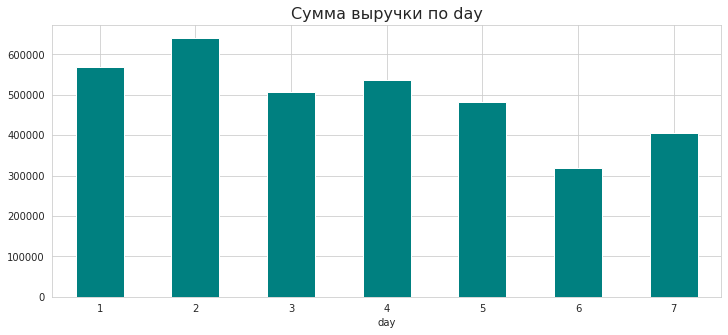

In [63]:
# создадим цикл для построения графиков
for columns in ['hour', 'day']:
    df.pivot_table(index = columns, values = 'total_price', aggfunc='sum', fill_value=0)\
    .plot.bar(figsize=(12, 5), grid=True, y=['total_price'], color='#008080', fontsize=10, legend=False)
    plt.title('Сумма выручки по ' + columns, fontsize=16)
    plt.xticks(rotation=0)
plt.show()

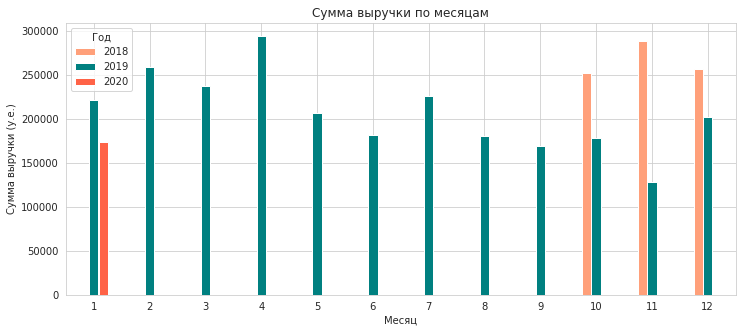

In [64]:
df.pivot_table(index='month', columns='year', values='total_price', aggfunc='sum', fill_value=0)\
.plot.bar(figsize=(12, 5), grid=True, fontsize=10, legend=True, color=['#FFA07A', '#008080', '#FF6347'])
plt.title('Сумма выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки (у.е.)')
plt.legend(title='Год') 
plt.xticks(rotation=0)
plt.show()

**Вывод:**
- Общая сумма выручки: 3461375.42 у.е.;
- Наибольшая сумма выручки у магазина отмечается во вторник в 13:00;
- Месяца с наибольшей выручкой в 2019 г. - февраль и апрель, с наименьшей - сентябрь и ноябрь. Выручка с октября по декабрь в 2018 г. была выше по сравнению в 2019 годом.

### Категоризация товарного ассортимента

In [65]:
# приведем наименования товаров к нижнему регистру и заменим ё на е
df['product'] = df['product'].str.lower()
df['product'] = df['product'].replace('ё', 'е', regex=True)

In [66]:
# посчитаем количество уникальных товаров
df['product'].nunique()

2247

In [67]:
df.head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,0,1,40,10,2018,1,0,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,0,1,40,10,2018,1,0,осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,0,1,40,10,2018,1,0,осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,0,1,40,10,2018,1,0,осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,0,1,40,10,2018,1,0,осень


In [68]:
df['product_reduction'] =  df['product'].apply(lambda x: re.sub(r'[^А-Яа-яd -]', '', str(x))) # оставим только русские символы в названиях
df['product_reduction'] = df['product_reduction'].str.replace('   ', ' ', regex=True) # уберем большие пробелы
df['product_reduction'] = df['product_reduction'].str.replace('  ', ' ', regex=True)
df['product_reduction'] = df['product_reduction'].str.rstrip() # вернем копию строки с удаленными символами
df['product_reduction'].value_counts()


пеларгония розебудная укорененный черенок                                                                   133
пеларгония розебудная d d укорененный черенок                                                                62
сумка-тележка -х колесная синяя                                                                              52
пеларгония зональная диам см сиреневый полумахровый                                                          51
сушилка для белья потолочная лиана м                                                                         46
пеларгония розебудная d укорененный черенок                                                                  31
петуния махровая рассада однолетних цветов в кассете по шт                                                   29
сумка-тележка хозяйственная синяя                                                                            26
пеларгония зональная ринго вайт d- см - см укорененный черенок                                          

In [69]:
garden = ['арбуз','артемизия','аспарагус','астра','ахарница', 'адиантум','азалия','аквилегия','алиссум','амариллис',
          'альбука','андесса','антуриум','аптения', 'алоэ', 'афеляндра', 'анемона', 'бадан','базилик', 'баклажан', 'бакопа',
          'бальза','барвинок','бархатцы','бегония', 'буддлея', 'бузульник', 'валериана', 'вербена','виола', 'газания', 
          'гвоздика','гардения', 'георгина', 'герань', 'гайлардия', 'гиацинт', 'гербера', 'гимнокалициум', 'гиностемма', 
          'гипсофила','годеция','горох','гортензия', 'глоксиния', 'декабрист', 'девичий', 'душица', 'дендробиум','джункус', 
          'диффенбахия','дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 'змееголовник', 'импатиенс','иссоп',
          'сантолина', 'кашпо', 'кабачок', 'каланхое', 'календула', 'калибрахоа','калла', 'калоцефалус', 'камнеломка',
          'кампанула', 'капуста', 'кипарисовик', 'клен', 'клубника', 'колокольчик', 'растение', 'кориандр','космея', 
          'крассула', 'крокусы','лаванда', 'мята', 'лантана','лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток',
          'мединилла','мелисса','многолетнее', 'молодило','петрушка','морковь', 'мята', 'настурция', 'незабудка','нолина', 
          'огурец', 'однолетнее', 'осина','патиссон','пахира', 'пеларгония', 'петрушка','петуни', 'портулак', 'примула', 
          'пуансеттия','радермахера', 'роза','розмарин','рудбекия','скиммия', 'ранункулус', 'тыква', 'фаленопсис','фиалка', 
          'фикус', 'фиттония', 'флокс', 'фуксия', 'хризантема', 'спатифиллум','суккулент', 'сциндапсус', 'тимьян','томат', 
          'томата', 'тюльпан', 'рассада','хлорофитум', 'хамедорея', 'калатея', 'каллуна', 'капсикум', 'хризолидокарпус', 
          'циперус', 'юкка нитчатая', 'рассада', 'нефролепис', 'овсянница', 'целозия', 'цикламен', 'шалфей','эвкалипт',
          'эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера', 'монарда', 'нивянник','пряные травы', 'солидаго', 
          'физостегия',  'салат рукола', 'пиретрум', 'лаватера', 'вигна','пеперомия',  'лобелия', 'мускари', 'пиретрум', 
          'муррайя', 'вероника', 'драцена', 'фатсия', 'хоста', 'укроп', 'смолевка', 'цинния', 'лавр', 'эхинацея', 'лилейник', 
          'платикодон', 'энотера','цитрофортунелла','мимоза', 'соланум', 'кореопсис', 'цинерария', 'подсолнечник', 'пуансетия',
          'кодонанта', 'эхинокактус']

household_goods = ['ткань', 'пододеяльник', 'декоративная','крючок','обувная','лоток','мусора','монетчатый','мусорный',
                   'набор вешалок','котовник','цветок искусственный', 'махровое','халат','набор ковров', 'наволочка', 
                   'наматрасник', 'одеяло', 'плед', 'подкладка', 'чехол','полотенце','простыня','скатерть','чехол','штора', 
                   'постельное','белье', 'ковер', 'кольца', 'полотенце','штора', 'простынь вафельная', 'покрывало', 
                   'комнатное', 'искусственный', 'ключница', 'искусственная', 'светиль','фото','комод','защитный',
                   'обувница','обуви','светильник', 'скатерть','двуспальное', 'сумка-тележка','плечики','полки','решетка',
                   'складная','стеллаж','сумка','тележка', 'хозяйственная','урна','этажерка','ящик','подставка','комод',
                   'карниз','этажерка','пуф','обувниц', 'бак','вакуумный','весы','петля','вешалка','вешалки','вкладыши',
                   'корзина','короб','коробка','кофр', 'корзинка с крышкой','наматрацник']

kitchen_goods = ['картофелемялка','кастрюля','кипятильник','кисточка','хлебница','интерьерный','кружка','крышка', 'кувшин', 
                 'кухонное','кухонные','столовая','чайная','холодца','мантоварка','набор бокалов','набор для пикника',
                 'набор ножей','набор стаканов','набор столовых приборов', 'набор фужеров','стакан','салатник','нож',
                 'ножеточка','овощеварка','овощечистка','пароварка','масленка','мерный','стакан','миксер','мини-сковорода',
                 'мирт','миска','модульная', 'подставка для яйца','тортница', 'муляж', 'чайный', 'набор', 'пресс', 
                 'комплект махровых', 'термос', 'бульонница', 'подушка','просеиватель','противень','разделочная','салатник',
                 'салфетка','сковорода', 'соковарка', 'сотейник','соковыжималка','стакан','стеклянная','тepмокружка','тарелка', 
                 'терка', 'термокружка','толкушка','форма','хлебница','ложка','чайная','чайник','электроштопор','сито', 
                 'котел', 'кофе', 'нетканые салфетки', 'скалка', 'венчик', 'половник', 'рыбочистка', 'орехоколка','банка',
                 'бидон', 'блюдо', 'блюдце', 'емкость']
                
bathroom = ['ванна','вантуз','ведро','держатель','дозатор','ерш','запасная','ванной','коврик','ковш','мыльница','ванн',
            'подголовник','пробка','унитаза','зубная','мыло','жидкое','мыло-скраб','увлажняющая','маска','фен']
          
cleaning = ['ароматизиро', 'прищепки','веник','гипоаллергенный','гель','гладильная','набор прищепок','доска','губка',
            'гладильная','кондиционер','защитная','контейнер','стирки', 'насадка', 'швабры','мытья','сушилка',
            'ведра', 'перчатки','тряп','швабр','совок','прищеп','налет','антижир','пылесос', 'щетка', 'веник',
            'подрукавник', 'для чистки','стирки','средство', 'мойк', 'утюг', 'гладильной', 'пылесос', 'средство', 
            'таз','тряпка','корзина','швабра','средство', 'таз', 'корыто', 'паста для полировки', 'швабр',
            'губка','сменный','дозатор', 'насадка', 'сметка', 'окномойка', 'чистящий','чистки','ведр','ерш',
            'тряпка','отбеливатель','для стирки','стиральный','чехол для гладильной доски']    
          
tools = ['инструмент','сверел','сверло','скребок','напильник','стремянк','стяжк','шпингалет','сварка','миксер','крепеж',
         'пружин','петл','линейк','бензин','завертка','крепеж','лестница','линейка','лопатка','шнур','строительного',
         'многофункциональный','набор прецизионных','полировки', 'пьезозажигалка', 'ручка','сверло','седум','сетка','сметка',
         'стремянка','стяжка','термометр', 'уголок','фарфоровая','сварка','шило','шнур','шпагат','штангенциркуль', 
         'фиксатор', 'основание для пробки', 'фал']


In [70]:
def category_product(product):
    for item in garden:
        if item in product:
            return 'товары для сада и огорода'
    for item in household_goods:
        if item in product:
            return 'товары для дома'
    for item in kitchen_goods:
        if item in product:
            return 'товары для кухни'
    for item in bathroom:
        if item in product:
            return 'товары для ванной'
    for item in cleaning:
        if item in product:
            return 'товары для уборки'
    for item in tools:
        if item in product:
            return 'инструменты'   
    return 'нет данных о категории'

In [71]:
df['category'] = df['product_reduction'].apply(category_product)

In [72]:
display(df.shape)
df.sample(10)

(5229, 18)

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,product_reduction,category
1603,2019-02-19 18:00:00,f124b272-34bb-4354-a514-8c918dbd2204,70358,"коврик интерьерный 45х75 вино comfort mats, mo...",1,974.0,974.0,2019-02-19,18,2,8,2,2019,1,0,зима,коврик интерьерный х вино,товары для кухни
3044,2019-05-13 15:00:00,3d5fef90-4a65-4a7e-84cf-010eba7b038d,14753,арбуз сибирские огни раннеспелый d-7 см,1,30.0,30.0,2019-05-13,15,1,20,5,2019,1,0,весна,арбуз сибирские огни раннеспелый d- см,товары для сада и огорода
1974,2019-03-17 18:00:00,ad935627-11d4-4a1c-9d69-cf0e33047aa8,14575,рассада томата (помидор) сорт любимец подмоско...,1,116.0,116.0,2019-03-17,18,7,11,3,2019,0,1,весна,рассада томата помидор сорт любимец подмосковь...,товары для сада и огорода
1824,2019-03-04 15:00:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,рассада зелени для кухни мята морокан диам. 9 см,2,120.0,240.0,2019-03-04,15,1,10,3,2019,1,0,весна,рассада зелени для кухни мята морокан диам см,товары для сада и огорода
1005,2018-12-11 08:00:00,c9f5dffa-0601-40d8-b690-8963a70ab521,69297,пресс для чеснока attribute western agw050,1,202.0,202.0,2018-12-11,8,2,50,12,2018,1,0,зима,пресс для чеснока,товары для кухни
3906,2019-07-05 14:00:00,4a3e8c01-1d47-4867-8a7f-14195a8dbb3d,14893,капуста кольраби венская белая 1350 в кассете ...,1,60.0,60.0,2019-07-05,14,5,27,7,2019,1,0,лето,капуста кольраби венская белая в кассете штуки...,товары для сада и огорода
4523,2019-09-28 14:00:00,f55afa87-4427-498e-9015-a6c5a76e4976,14937,пеларгония зональная диам. 12 см коралловая по...,1,188.0,188.0,2019-09-28,14,6,39,9,2019,0,1,осень,пеларгония зональная диам см коралловая полума...,товары для сада и огорода
3435,2019-05-28 09:00:00,c04be3cd-fa24-4d94-b2de-2c863a315dd2,14824,"рудбекия тайгер голд золотой объем 0,75 л",2,97.0,194.0,2019-05-28,9,2,22,5,2019,1,0,весна,рудбекия тайгер голд золотой объем л,товары для сада и огорода
4962,2019-11-28 12:00:00,c15e1560-2b6b-4e8f-8076-9bf7c3a06553,111799,кофр для хранения одеял hausmann 60х50х35 см a...,1,389.0,389.0,2019-11-28,12,4,48,11,2019,1,0,осень,кофр для хранения одеял хх см,товары для дома
1153,2018-12-25 10:00:00,19385fc3-fdc2-41dd-8114-aefa73229132,69580,аспарагус спренжери d-12 см,1,194.0,194.0,2018-12-25,10,2,52,12,2018,1,0,зима,аспарагус спренжери d- см,товары для сада и огорода


In [73]:
#пересчитаем остались ли товары без категории
len(df.query('category == "нет данных о категории"'))

0

In [74]:
df[df['category'] == 'нет данных о категории']

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,product_reduction,category


In [75]:
# удалим столбец product_reduction, который нам больше не понадобится и вернем сортировку по индексу
df.drop(['product_reduction'], axis= 1 , inplace= True )
df = df.sort_index(ascending=True)

In [76]:
df.head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода


In [77]:
df['category'].value_counts()

товары для сада и огорода    3219
товары для дома               906
товары для кухни              506
товары для уборки             307
товары для ванной             193
инструменты                    98
Name: category, dtype: int64

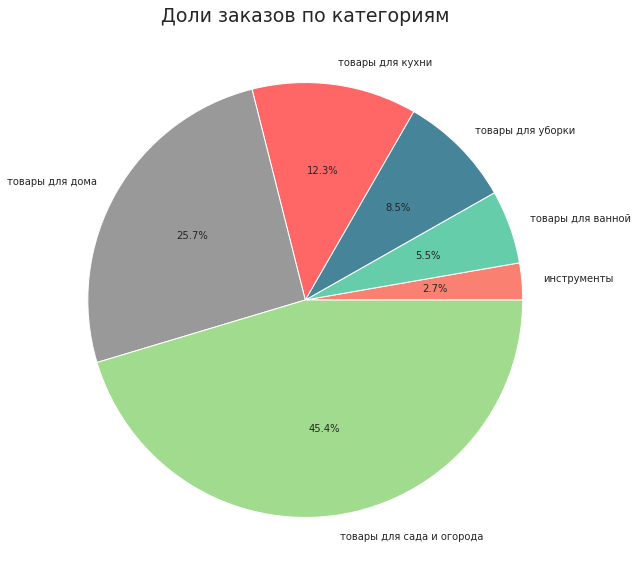

In [78]:
#построим круговую диаграмму 
categories = df.groupby('category')[['order_id']].nunique().sort_values(by='order_id')
plt.figure(figsize = (10, 10))
plt.pie(categories['order_id'], labels = categories.index, colors=[
    '#fa8072', '#66cdaa', '#468499', '#ff6666', '#999999', '#a0db8e'], autopct='%.1f%%',  pctdistance= 0.6)
plt.title('Доли заказов по категориям', fontsize=19)
plt.show()

In [79]:
#сгруппируем товары
grouped_by_product = df.groupby('product').agg({'customer_id':'nunique', 'quantity':'count', 'total_price':'sum', 'category':'first'})\
                     .reset_index()\
                     .sort_values(by='customer_id', ascending=False)
grouped_by_product.columns = ['product', 'customers', 'quantity','total_revenue', 'category']
grouped_by_product.head()

,product,customers,quantity,total_revenue,category
1006,пеларгония розебудная red pandora укорененный ...,60,62,10391.333333,товары для сада и огорода
1004,пеларгония розебудная prins nikolai укорененны...,49,52,7954.500000,товары для сада и огорода
978,пеларгония зональная диам. 12 см сиреневый пол...,47,51,9821.000000,товары для сада и огорода
1559,сумка-тележка 2-х колесная gimi argo синяя,41,44,47258.000000,товары для дома
1003,пеларгония розебудная mary укорененный черенок,34,38,6200.500000,товары для сада и огорода


In [80]:
#определим ТОР-5 товаров в каждой категории
for category in grouped_by_product['category'].unique():
    display(f"ТОР-5: {category}")   
    display(grouped_by_product[grouped_by_product['category']==category].head(5))
    print('')

'ТОР-5: товары для сада и огорода'

,product,customers,quantity,total_revenue,category
1006,пеларгония розебудная red pandora укорененный ...,60,62,10391.333333,товары для сада и огорода
1004,пеларгония розебудная prins nikolai укорененны...,49,52,7954.500000,товары для сада и огорода
978,пеларгония зональная диам. 12 см сиреневый пол...,47,51,9821.000000,товары для сада и огорода
1003,пеларгония розебудная mary укорененный черенок,34,38,6200.500000,товары для сада и огорода
1002,пеларгония розебудная margaretha укорененный ч...,30,30,6221.666667,товары для сада и огорода


'ТОР-5: товары для дома'

,product,customers,quantity,total_revenue,category
1559,сумка-тележка 2-х колесная gimi argo синяя,41,44,47258.00,товары для дома
1824,тележка багажная delta тбр-20 синий грузоподъе...,16,16,11711.75,товары для дома
1823,тележка багажная delta тбр-20 коричневый с ора...,13,13,9523.00,товары для дома
1822,тележка багажная delta тбр-15 цвет в ассортиме...,9,9,5622.00,товары для дома
1558,сумка-тележка 2-х колесная gimi argo красная,9,9,9783.00,товары для дома


'ТОР-5: товары для уборки'

,product,customers,quantity,total_revenue,category
1781,"таз пластмассовый со стиральной доской (иж), 1...",9,9,2997.0,товары для уборки
268,гладильная доска ника blues 124х46 см 5757,7,7,17786.0,товары для уборки
286,"гладильная доска ника дсп эконом 106,5х29 эк1",6,7,7633.0,товары для уборки
252,гладильная доска sarayli new elegant 125x45 см,6,7,17843.0,товары для уборки
277,гладильная доска ника бест 122х40 см нб,5,5,7496.0,товары для уборки


'ТОР-5: товары для кухни'

,product,customers,quantity,total_revenue,category
812,"муляж яблоко, оранжевый, 8,5 см, полиуретан",8,8,2948.666667,товары для кухни
779,муляж красное яблоко мини полиуретан d-6 см,7,7,1279.000000,товары для кухни
800,муляж персики мини полиуретан d-6 см,7,7,564.000000,товары для кухни
751,муляж банан желтый 21 см полиуретан,6,6,5831.000000,товары для кухни
773,муляж желудь 2 шт,5,5,440.000000,товары для кухни


'ТОР-5: товары для ванной'

,product,customers,quantity,total_revenue,category
351,"ерш унитазный с деревянной ручкой , ваир 1712012",6,6,4616.0,товары для ванной
516,коврик придверный attribute nature кокосовый 6...,5,5,17227.5,товары для ванной
1447,"сиденье в ванну раздвижное, белый, св5, ника",5,5,1728.0,товары для ванной
537,коврик придверный хлопковый 60х140 см мультико...,5,5,3047.0,товары для ванной
622,"корыто оцинкованное 45 л бесшовное, 1303007",5,5,5243.0,товары для ванной


'ТОР-5: инструменты'

,product,customers,quantity,total_revenue,category
1552,"стяжка оконная с болтом ст-55 цинк, 1108354",4,5,748.333333,инструменты
98,"бензин для зажигалок, 1205214",4,4,402.000000,инструменты
683,лестница стремянка зми конек медный антик тс 277,3,3,2922.000000,инструменты
693,"линейка, длина 30 см, truper, rgl-30/14387",3,3,741.000000,инструменты
1441,седум почвопокровный смесь окрасок объем 1 л,3,3,412.000000,инструменты


**Вывод:**
- Основную долю товарного ассортимента магазина составляют товары категории «сад и огород» - 45.3%, товары для дома составляют 25.7% ассортимента, товары для кухни - 12.2%, товары для уборки - 8.5%, товары для ванной - 5.5%, наименьшее количество ассортимента составляют инструменты - 2.7%



- В категории «товары для сада и огорода» самый продаваемый товар: пеларгония розебудная red pandora;
- В категории «товары для дома» самый продаваемый товар: сумка-тележка 2-х колесная gimi argo синяя;
- В категории « товары для кухни» самый продаваемый товар: муляж яблоко, оранжевый, 8,5 см;
- В категории «товары для уборки» самый продаваемый товар: таз пластмассовый со стиральной доской;
- В категории « товары для ванной» самый продаваемый товар: ерш унитазный с деревянной ручкой;
- В категории «инструменты» самый продаваемый товар: стяжка оконная с болтом ст-55 цинк.


### ABC-анализ товаров

АВС-анализ товаров состоит из следующих шагов: 
- сортировка товаров от большего к меньшему по цене и количеству;
- разделение продуктов на 3 группы в соотношении между группами А, В и С — 80/15/5: 
    - "А" самые важные
    - "В" средние
    - "С" наименее важные;
- анализ результатов.

In [81]:
# добавляем в таблицу столбец part с процентом цены товара
df['part_price'] = round(df['price']/df['price'].sum()*100,3)

df = df.sort_values(by='price', ascending = False)

# расчитываем накопительный процент цены товара
df['cum_part_p'] = df['part_price'].cumsum()

# присваиваем группу ABC по накопленному проценту
def cum_part(abc):
    try:
        if abc <= 80:
            return 'A'
        elif 80 < abc <= 95:
            return 'B'
        elif  abc > 95:
            return 'C'
    except:
        pass


In [82]:
df['group1']=df['cum_part_p'].apply(cum_part)

In [83]:
df.head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,category,part_price,cum_part_p,group1
4123,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,14917.0,2019-07-29,17,1,31,7,2019,1,0,лето,товары для сада и огорода,0.544,0.544,A
2257,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,сумка-тележка хозяйственная andersen royal sho...,1,8737.0,8737.0,2019-04-05,19,5,14,4,2019,1,0,весна,товары для дома,0.319,0.863,A
1664,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,сумка-тележка хозяйственная andersen alu star ...,1,8437.0,8437.0,2019-02-24,10,7,8,2,2019,0,1,зима,товары для дома,0.308,1.171,A
2501,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,сумка-тележка хозяйственная rolser mnb019 rojo...,1,8077.0,8077.0,2019-04-21,16,7,16,4,2019,0,1,весна,товары для дома,0.295,1.466,A
5461,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,сумка-тележка хозяйственная rolser mnb019 rojo...,1,8077.0,8077.0,2020-01-26,19,7,4,1,2020,0,1,зима,товары для дома,0.295,1.761,A


In [84]:
df['group1'].value_counts()

B    1966
C    1909
A    1354
Name: group1, dtype: int64

In [85]:
# добавляем в таблицу столбец part с процентом количества товара
df['part_quantity'] = round(df['quantity']/df['quantity'].sum()*100,3)

df = df.sort_values(by='quantity', ascending = False)

# расчитываем накопительный процент 

df['cum_part_q'] = df['part_quantity'].cumsum()

# присваиваем группу ABC по накопленному проценту
df['group2']=df['cum_part_q'].apply(cum_part)


In [86]:
df.head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,category,part_price,cum_part_p,group1,part_quantity,cum_part_q,group2
1588,2019-02-18 16:00:00,74b08ab4-16e9-4d83-9c31-acfc9d229bc5,70328,муляж лимон желтый 9 см полиуретан,50,51.0,2550.0,2019-02-18,16,1,8,2,2019,1,0,зима,товары для кухни,0.002,99.085,C,0.509,0.509,A
4713,2019-10-22 16:00:00,511115b7-e981-4069-9e0e-88a3551341a6,73063,муляж яблоко зеленый 9 см полиуретан,50,51.0,2550.0,2019-10-22,16,2,43,10,2019,1,0,осень,товары для сада и огорода,0.002,99.089,C,0.509,1.018,A
4719,2019-10-23 11:00:00,2fac41bf-e800-4bc3-a4b3-0df800f33e99,73073,"ведро резинопластиковое строительное 12,0 л (м...",50,64.0,3200.0,2019-10-23,11,3,43,10,2019,1,0,осень,товары для сада и огорода,0.002,98.663,C,0.509,1.527,A
1719,2019-02-27 09:00:00,377c8a20-a3e0-4945-9fd8-a1f4ada5d8b0,70482,муляж банан желтый 21 см полиуретан,50,51.0,2550.0,2019-02-27,9,3,9,2,2019,1,0,зима,товары для кухни,0.002,99.079,C,0.509,2.036,A
1243,2019-01-11 22:00:00,34b2bf7d-7cd8-4aba-909d-396655d77f7e,69793,вешалка valiant для брюк и юбок металлическая ...,50,94.0,4700.0,2019-01-11,22,5,2,1,2019,1,0,зима,товары для дома,0.003,97.252,C,0.509,2.545,A


In [87]:
df['abc'] = df['group1'] + df['group2']

In [88]:
df.head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,category,part_price,cum_part_p,group1,part_quantity,cum_part_q,group2,abc
1588,2019-02-18 16:00:00,74b08ab4-16e9-4d83-9c31-acfc9d229bc5,70328,муляж лимон желтый 9 см полиуретан,50,51.0,2550.0,2019-02-18,16,1,8,2,2019,1,0,зима,товары для кухни,0.002,99.085,C,0.509,0.509,A,CA
4713,2019-10-22 16:00:00,511115b7-e981-4069-9e0e-88a3551341a6,73063,муляж яблоко зеленый 9 см полиуретан,50,51.0,2550.0,2019-10-22,16,2,43,10,2019,1,0,осень,товары для сада и огорода,0.002,99.089,C,0.509,1.018,A,CA
4719,2019-10-23 11:00:00,2fac41bf-e800-4bc3-a4b3-0df800f33e99,73073,"ведро резинопластиковое строительное 12,0 л (м...",50,64.0,3200.0,2019-10-23,11,3,43,10,2019,1,0,осень,товары для сада и огорода,0.002,98.663,C,0.509,1.527,A,CA
1719,2019-02-27 09:00:00,377c8a20-a3e0-4945-9fd8-a1f4ada5d8b0,70482,муляж банан желтый 21 см полиуретан,50,51.0,2550.0,2019-02-27,9,3,9,2,2019,1,0,зима,товары для кухни,0.002,99.079,C,0.509,2.036,A,CA
1243,2019-01-11 22:00:00,34b2bf7d-7cd8-4aba-909d-396655d77f7e,69793,вешалка valiant для брюк и юбок металлическая ...,50,94.0,4700.0,2019-01-11,22,5,2,1,2019,1,0,зима,товары для дома,0.003,97.252,C,0.509,2.545,A,CA


In [89]:
df['abc'].value_counts()

CA    1908
BB     793
BA     791
AB     707
AA     615
BC     382
AC      32
CC       1
Name: abc, dtype: int64

In [90]:
df[df['abc'] == 'AA'].head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,category,part_price,cum_part_p,group1,part_quantity,cum_part_q,group2,abc
1272,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-0...,27,1755.0,47385.0,2019-01-15,13,2,3,1,2019,1,0,зима,товары для сада и огорода,0.064,47.061,A,0.275,10.077,A,AA
1451,2019-02-07 09:00:00,af4d270b-c7ae-4af5-9582-4e61ff08eff0,70135,"веник сорго с деревянной ручкой с 4-мя швами, ...",20,550.0,11000.0,2019-02-07,9,4,6,2,2019,1,0,зима,товары для уборки,0.020,77.998,A,0.204,16.989,A,AA
2482,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,наматрацник natures бархатный бамбук бб-н-1-2 ...,12,1183.0,14196.0,2019-04-19,18,5,16,4,2019,1,0,весна,товары для дома,0.043,58.074,A,0.122,24.540,A,AA
3545,2019-06-04 07:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,скатерть круглая d-175 см 50% полиэстер 50% хл...,10,1140.0,11400.0,2019-06-04,7,2,23,6,2019,1,0,лето,товары для сада и огорода,0.042,59.002,A,0.102,25.620,A,AA
2483,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,одеяло wellness t142 белое темостеганое 140х20...,10,1568.0,15680.0,2019-04-19,19,5,16,4,2019,1,0,весна,товары для дома,0.057,53.502,A,0.102,27.252,A,AA


In [91]:
df[df['abc'] == 'CC']

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,category,part_price,cum_part_p,group1,part_quantity,cum_part_q,group2,abc
5098,2019-12-17 12:00:00,1f7a71e2-0e7a-47ee-89d8-320b6315f4c7,107078,"львиный зев волшебный ковер 0,05 г 4660010779639",1,9.0,9.0,2019-12-17,12,2,51,12,2019,1,0,зима,товары для сада и огорода,0.0,99.757,C,0.01,99.145,C,CC


- Товары категорий AA, AB, ВA основные товары для магазина, с которыми стоит активно работать и всегда держать их на складе;
- Товары категорий ВВ, CA, АС уверенный "середнячок" отнесем их к дополнительным товарам;
- Товары категорий BC, CB являются наименее ценными для магазина, товар, попавший в категорию СС рекомендуется к выводу из ассортимента.

In [92]:
# удалим столбцы, которые использовали для промежуточных подсчетов и вернем сортировку по индексу
df.drop(['part_price', 'cum_part_p', 'group1', 'part_quantity', 'cum_part_q', 'group2'], axis= 1 , inplace= True )
df = df.sort_index(ascending=True)

In [93]:
df.head()

,date,customer_id,order_id,product,quantity,price,total_price,order_date,hour,day,week,month,year,weekdays,weekends,season,category,abc
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода,BA
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода,BC
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода,CA
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода,BB
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,0,1,40,10,2018,1,0,осень,товары для сада и огорода,CA


In [94]:
#сгруппируем товары
group_abc = df.groupby('product').agg({'price':'sum', 'quantity':'count', 'abc':'first', 'category':'first'})\
                     .reset_index()\
                     .sort_values(by='quantity', ascending=False)
group_abc.columns = ['product', 'total_price', 'quantity','abc', 'category']
group_abc.head()

,product,total_price,quantity,abc,category
1006,пеларгония розебудная red pandora укорененный ...,8371.333333,62,BA,товары для сада и огорода
1004,пеларгония розебудная prins nikolai укорененны...,7010.500000,52,BA,товары для сада и огорода
978,пеларгония зональная диам. 12 см сиреневый пол...,8619.000000,51,BB,товары для сада и огорода
1559,сумка-тележка 2-х колесная gimi argo синяя,47258.000000,44,AA,товары для дома
1003,пеларгония розебудная mary укорененный черенок,5122.500000,38,BA,товары для сада и огорода


In [95]:
#определим ТОР-5 товаров в каждой категории
for group in group_abc['abc'].unique():
    display(f"ТОР-5: {group}")   
    display(group_abc[group_abc['abc']==group].head(5))
    print('')

'ТОР-5: BA'

,product,total_price,quantity,abc,category
1006,пеларгония розебудная red pandora укорененный ...,8371.333333,62,BA,товары для сада и огорода
1004,пеларгония розебудная prins nikolai укорененны...,7010.500000,52,BA,товары для сада и огорода
1003,пеларгония розебудная mary укорененный черенок,5122.500000,38,BA,товары для сада и огорода
1005,пеларгония розебудная queen ingrid укорененный...,4209.333333,31,BA,товары для сада и огорода
1002,пеларгония розебудная margaretha укорененный ч...,4065.666667,30,BA,товары для сада и огорода


'ТОР-5: BB'

,product,total_price,quantity,abc,category
978,пеларгония зональная диам. 12 см сиреневый пол...,8619.0,51,BB,товары для сада и огорода
959,пеларгония зональная диам. 12 см коралловая по...,4170.0,24,BB,товары для сада и огорода
986,пеларгония зональная махровая лососевая,3923.0,23,BB,товары для сада и огорода
980,пеларгония зональная диам. 12 см темнорозовая ...,3737.0,22,BB,товары для сада и огорода
979,пеларгония зональная диам. 12 см сиреневый про...,2666.0,16,BB,товары для сада и огорода


'ТОР-5: AA'

,product,total_price,quantity,abc,category
1559,сумка-тележка 2-х колесная gimi argo синяя,47258.00,44,AA,товары для дома
1824,тележка багажная delta тбр-20 синий грузоподъе...,11711.75,16,AA,товары для дома
1823,тележка багажная delta тбр-20 коричневый с ора...,9148.00,13,AA,товары для дома
1726,"сушилка для белья потолочная лиана 2,0 м 1703009",6589.00,11,AA,товары для сада и огорода
1728,"сушилка для белья потолочная лиана 2,4 м 1703011",6606.00,9,AA,товары для сада и огорода


'ТОР-5: CA'

,product,total_price,quantity,abc,category
992,пеларгония зональная ринго вайт d-7 см h-10 см...,1850.0,25,CA,товары для сада и огорода
923,однолетнее растение петуния махровая в кассете...,1566.0,19,CA,товары для сада и огорода
954,пеларгония toscana angeleyes bicolor укорененн...,1792.0,16,CA,товары для сада и огорода
952,пеларгония toscana angeleyes amarillo burgundy...,1792.0,16,CA,товары для сада и огорода
1229,рассада зелени для кухни розмарин блю лагун ди...,1793.0,15,CA,товары для сада и огорода


'ТОР-5: BC'

,product,total_price,quantity,abc,category
1706,сушилка для белья настенная zalger prima 510-7...,4337.0,16,BC,товары для сада и огорода
1061,петуния простая рассада однолетних цветов в ка...,1470.0,7,BC,товары для сада и огорода
286,"гладильная доска ника дсп эконом 106,5х29 эк1",3143.0,7,BC,товары для уборки
1675,сушилка для белья лиана люкс 130 см потолочная,2562.0,6,BC,товары для сада и огорода
905,"овощеварка алюминиевая scovo мт-045, хозлэнд, ...",2245.0,5,BC,товары для кухни


'ТОР-5: AB'

,product,total_price,quantity,abc,category
1558,сумка-тележка 2-х колесная gimi argo красная,9783.0,9,AB,товары для дома
268,гладильная доска ника blues 124х46 см 5757,17786.0,7,AB,товары для уборки
252,гладильная доска sarayli new elegant 125x45 см,17843.0,7,AB,товары для уборки
1566,сумка-тележка 2-х колесная gimi galaxy черная,19568.0,7,AB,товары для дома
2223,эвкалипт гунни d-17 см h-60 см,9866.0,6,AB,товары для сада и огорода


'ТОР-5: AC'

,product,total_price,quantity,abc,category
2092,чехол для гладильной доски attribute metal 140...,4071.333333,6,AC,товары для дома
1735,сушилка для белья потолочная лиана люкс 200 см...,1948.000000,4,AC,товары для сада и огорода
1083,подвесное кашпо бакопа ампельная мега-крупная ...,1464.000000,3,AC,товары для сада и огорода
1089,подвесное кашпо калибрахоа confetti mysweethea...,1464.000000,3,AC,товары для сада и огорода
598,корзина для белья виолет с крышкой ротанг 40 л...,1461.000000,3,AC,товары для сада и огорода


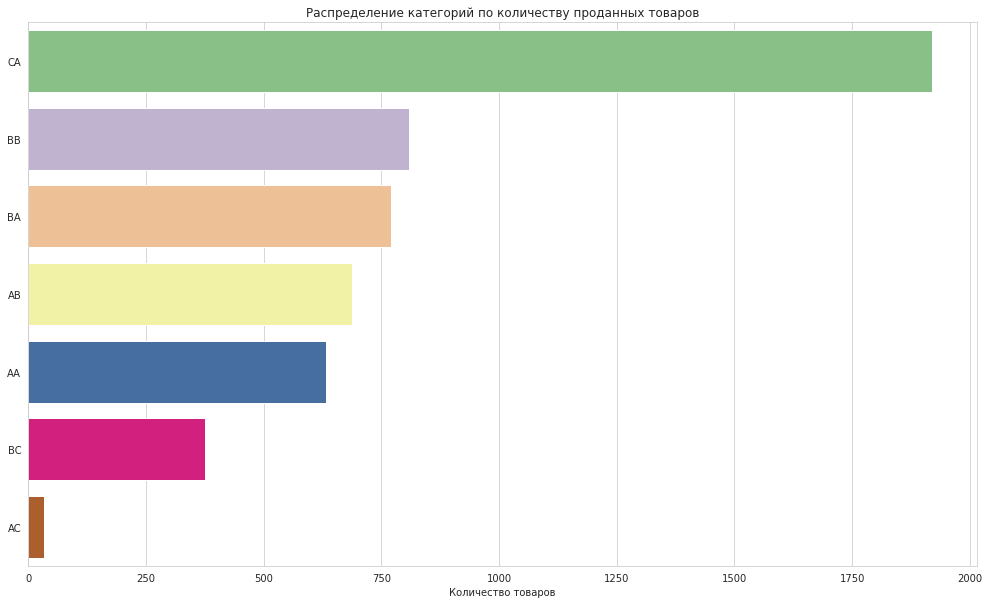

In [96]:
abc_group = (group_abc.groupby('abc', as_index=False)['quantity'].sum()
                 .sort_values(by='quantity', ascending=False)
                 .head(20))

plt.figure(figsize=(17,10))
sns.set_style('whitegrid')
sns.barplot(y = 'abc',
            x = 'quantity',
            data = abc_group,
            palette = 'Accent')

plt.title('Распределение категорий по количеству проданных товаров')
plt.xlabel('Количество товаров')
plt.ylabel('');

В большем количестве продаются товары категории "СА", на втором месте категория "ВА". Примерно в одинаковом количестве продаются товары в группах "АВ", "ВВ", "АА". В малом количестве продаются товары категории "АС".

Некоторые товары категорий "AA, AB, ВA", которые пользуются спросом и важны для магазина:
- сушилка для белья напольная ника;
- тележка багажная delta;
- сушилка для белья потолочная лиана;
- хлебница деревянная (бук);
- сумка-тележка 2-х колесная gimi argo;
- пеларгония розебудная.


Некоторые товары категорий "BC, CB, CC", которые являются наименее ценными для магазина и могут быть рекомендованы к выводу из ассортимента:
- львиный зев волшебный ковер;
- сушилка для белья настенная zalger prima;
- петуния простая рассада;
- гладильная доска ника дсп эконом; 
- сушилка для белья лиана люкс 130 см потолочная;
- подрукавник складной ника;
- муляж желудь;
- петуния surprise white;
- петуния potunia plus purple;
- многолетнее растение тимьян-чабрец.


### Анализ выручки по категориям товаров

In [97]:
#создадим сгуппированный датафрейм по категориям
group_by_category = df.groupby('category').agg({'total_price':'sum', 'order_id':'nunique',
                                                      'customer_id':'nunique', 'quantity':'sum'})
group_by_category.columns = ['revenue', 'orders', 'customers', 'quantity']

#посчитаем средний доход, полученный от каждого покупателя
group_by_category['revenue_per_customer'] = group_by_category['revenue'] / group_by_category['customers']

#посчитаем средний доход, полученный с каждого заказа
group_by_category['revenue_per_order'] = group_by_category['revenue'] / group_by_category['orders']
group_by_category = group_by_category.sort_values(by='revenue', ascending = False)

#доля выручки/покупателей/заказов от общего количества
group_by_category['ratio_revenue'] = ((group_by_category['revenue'] /group_by_category['revenue'].sum())* 100)\
                                                                                    .round(1).astype('str')+'%'
group_by_category

,revenue,orders,customers,quantity,revenue_per_customer,revenue_per_order,ratio_revenue
category,,,,,,,
товары для дома,1.360401e+06,864,792,1857,1717.678136,1574.538291,39.3%
товары для сада и огорода,1.123203e+06,1525,1297,5200,866.001028,736.526776,32.4%
товары для уборки,4.030605e+05,285,271,448,1487.308118,1414.247368,11.6%
товары для кухни,2.723227e+05,412,391,1605,696.477408,660.977346,7.9%
товары для ванной,1.801855e+05,184,177,472,1017.997175,979.269022,5.2%
инструменты,1.222023e+05,92,88,237,1388.662879,1328.286232,3.5%


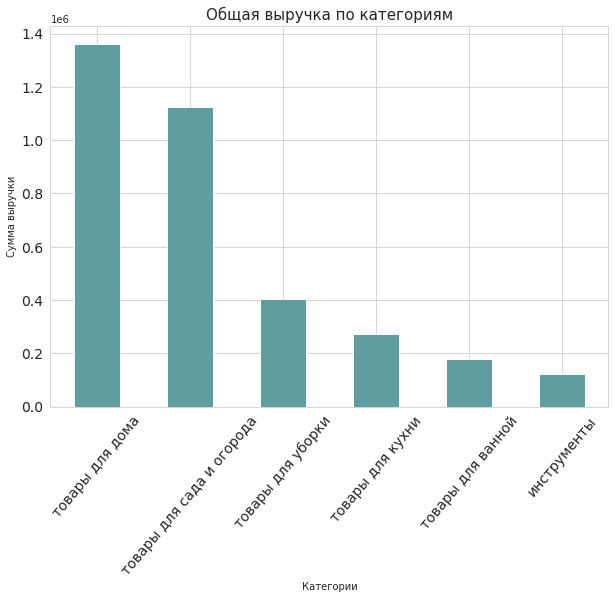

In [98]:
# Построим график по сумме выручки по категориям.
sns.set_style('whitegrid')
group_by_category.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True, color='cadetblue', fontsize=14, legend=False)
plt.title('Общая выручка по категориям', fontsize=15)
plt.xlabel('Категории')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=50) 
plt.show()

#### Количество заказов по категориям и средний чек

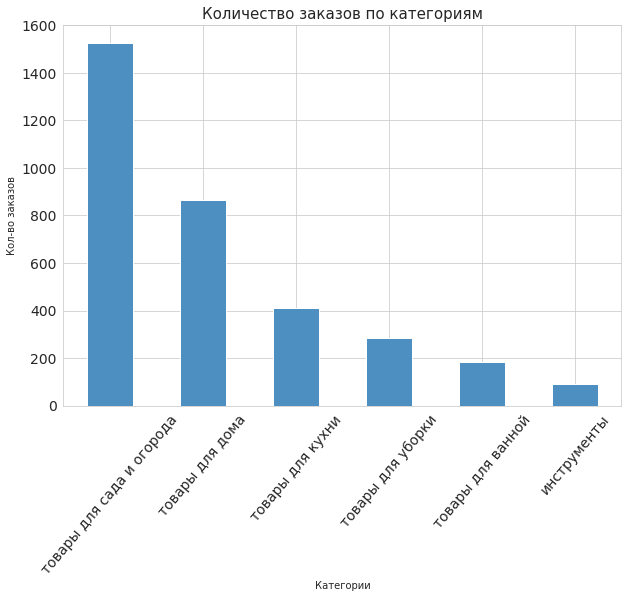

In [99]:
# Построим график по кол-ву заказов по категориям.
sns.set_style('whitegrid')
group_by_category.sort_values(by='orders', ascending=False)\
                 .plot(kind='bar', y=['orders'], figsize=(10,7), grid=True, color='#4e8fc2', fontsize=14, legend=False)
plt.title('Количество заказов по категориям', fontsize=15)
plt.xlabel('Категории')
plt.ylabel('Кол-во заказов')
plt.xticks(rotation=50) 
plt.show()

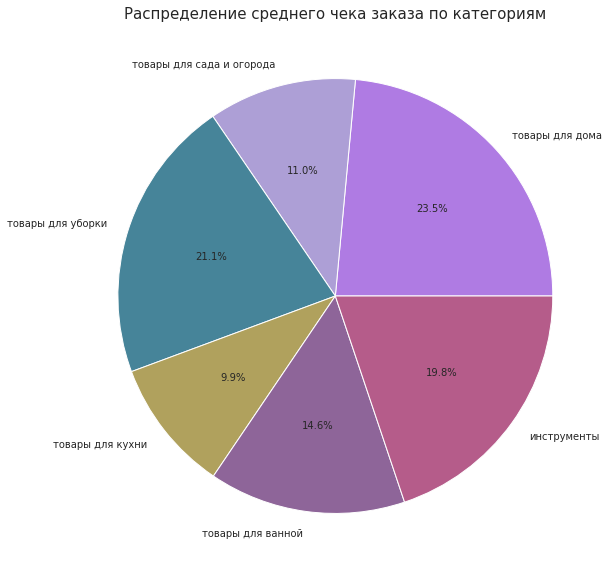

In [100]:
group_by_category.sort_values(by='revenue_per_order', ascending=False)
plt.figure(figsize = (10, 10))
plt.pie(group_by_category['revenue_per_order'], labels = group_by_category.index, colors=[
    '#af7be3', '#ad9fd6', '#468499', '#b0a15d', '#8e6599', '#b55c8a'], autopct='%.1f%%',  pctdistance= 0.6)
plt.title('Распределение среднего чека заказа по категориям', fontsize=15)
plt.show()

#### Количество покупателей по категориям и средний чек

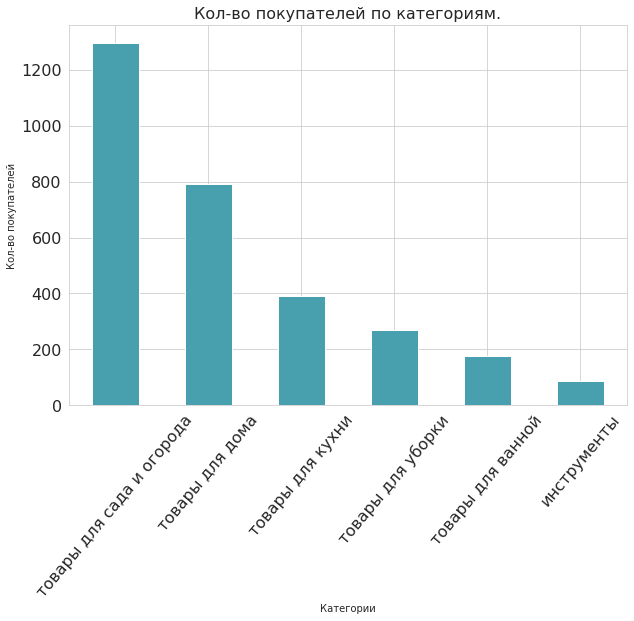

In [101]:
# Построим график по кол-ву покупателей по категориям.
sns.set_style('whitegrid')
group_by_category.sort_values(by='customers', ascending=False)\
                 .plot(kind='bar', y=['customers'], figsize=(10,7), grid=True, color='#489fae', fontsize=16, legend=False)
plt.title('Кол-во покупателей по категориям.', fontsize=16)
plt.xlabel('Категории')
plt.ylabel('Кол-во покупателей')
plt.xticks(rotation=50)           
plt.show()

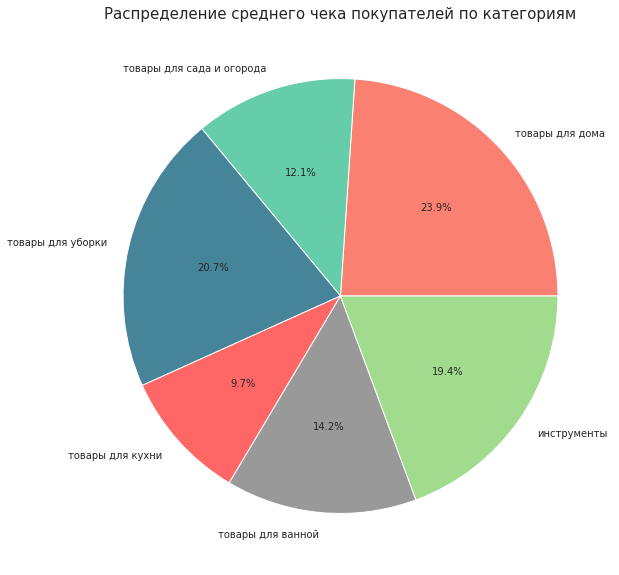

In [102]:
group_by_category.sort_values(by='revenue_per_customer', ascending=False)
plt.figure(figsize = (10, 10))
plt.pie(group_by_category['revenue_per_customer'], labels = group_by_category.index, colors=[
    '#fa8072', '#66cdaa', '#468499', '#ff6666', '#999999', '#a0db8e'], autopct='%.1f%%',  pctdistance= 0.6)
plt.title('Распределение среднего чека покупателей по категориям', fontsize=15)
plt.show()

**Вывод:**

- По общей сумме выручки наиболее прибыльная категория — это «товары для дома», после следует категория «товары для сада и огорода». Наименьшую выручку магазин получает в категории инструменты;
- Самое большое количество продаваемых товаров в категории «товары для сада и огорода». Товары этой категории составляют основной ассортимент магазаина;
- Самый высокий средний чек в категории «товары для дома», на втором месте «товары для уборки»;
- В категории «товары для кухни» самый низкий средний чек. 

### Кумулятивная выручка по категориям товаров

In [103]:
def cummulative (df, group):
    
    #df - датасет; group - столбец для группировки
    
    #создадим массив уникальных пар значений дат и групп для покупок
    dates_groups = df[['date', group]].drop_duplicates()
    
    #соберём агрегированные кумулятивные данные о заказах и покупателях по дням
    product_group_agg = dates_groups.apply(lambda x: df[np.logical_and(df['date'] <= x['date'], df[group] == x[group])]
                                            .agg({'date': 'max', group: 'max', 'order_id': pd.Series.nunique,
                                                  'customer_id': pd.Series.nunique, 'total_price': 'sum'}),
                                            axis=1).sort_values(by=['date', group])
    
    #соберём агрегированные кумулятивные данные о товарах по дням
    customers_agg = dates_groups.apply(lambda x: df[np.logical_and(df['date'] <= x['date'], df[group] == x[group])]
                                       .agg({'date': 'max', group: 'max', 'quantity': 'sum'}),
                                       axis=1).sort_values(by=['date', group])
    
    # Объединим кумулятивные данные в одной таблице и переименуем столбцы
    result = product_group_agg.merge(customers_agg, on=['date', group])
    result.columns = ['date', group, 'orders', 'customers', 'revenue', 'quantity']
    return result

In [104]:
df_cum = cummulative(df, 'category')

In [105]:
df_cum.head()

,date,category,orders,customers,revenue,quantity
0,2018-10-01 00:00:00,товары для сада и огорода,1,1,1037.0,7
1,2018-10-01 08:00:00,товары для сада и огорода,2,2,1861.0,8
2,2018-10-01 08:00:00,товары для уборки,1,1,269.0,1
3,2018-10-01 11:00:00,товары для дома,1,1,820.0,10
4,2018-10-01 12:00:00,товары для сада и огорода,3,3,2475.0,9


In [106]:
# функция построения графика
def plot_cum(df, column, group, date, title, group_name, ylabel):
    
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set(title=title+' по группам '+group_name, xlabel='дата', ylabel=ylabel)
    for category in df[group].unique():
        df_categ = df[df[group] == category]
        ax.plot(df_categ[date], df_categ[column], '-', label=category)
    xlabels = ax.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.52, 1))
    plt.show()

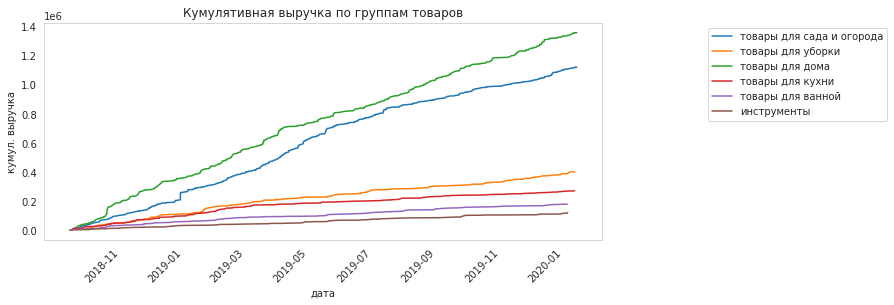

In [107]:
plot_cum(df_cum, 'revenue', 'category', 'date', 'Кумулятивная выручка', 'товаров', 'кумул. выручка')

По графику кумулятивной выручки, самой доходной для магазина категорией является "товары для дома", на втором месте "товары для сада и огорода". 
Примерно одинаковый доход приносят категории "товары для уборки" и "товары для кухни". 
Самой неприбыльной категорией по кумулятивной выручке является категория "инструменты".

In [108]:
# добавим столбец кумулятивного среднего чека, разделим кумулятивную выручку на кумулятивное количество товаров
df_cum['avg_price'] = df_cum['revenue'] / df_cum['quantity']

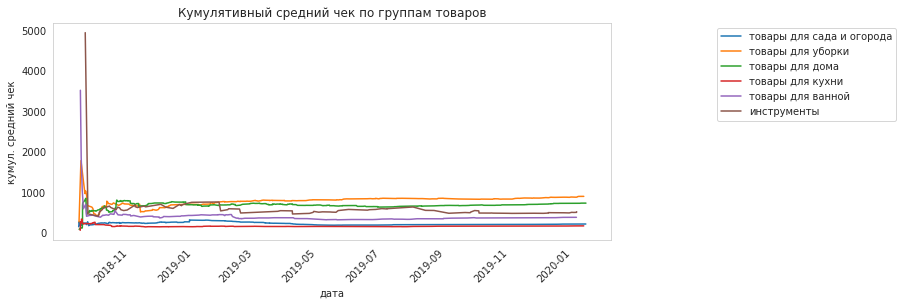

In [109]:
# построим график
plot_cum(df_cum, 'avg_price', 'category', 'date', 'Кумулятивный средний чек', 'товаров', 'кумул. средний чек')

В октябре 2018 г. наблюдаются крупные по стоимости покупки в категориях "товары для ванной" и "инструменты", что мешает рассмотреть различия между всеми категориями. "Обрежем" октябрь 2018 г. и уберем выбросы чтобы укрупнить график.


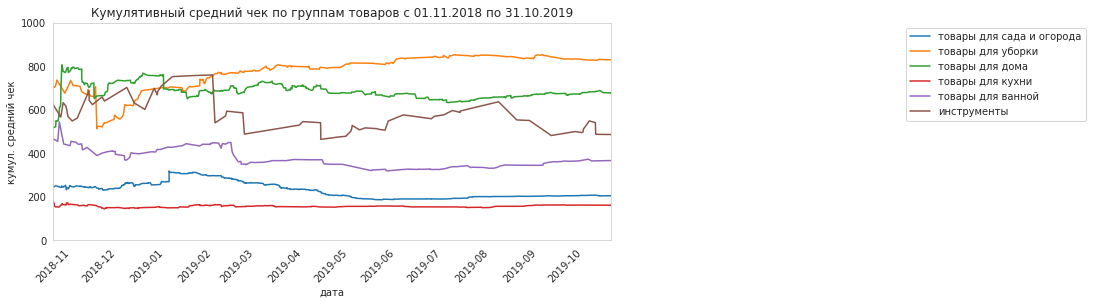

In [110]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set(title='Кумулятивный средний чек по группам товаров c 01.11.2018 по 31.10.2019', xlabel='дата',
       ylabel='кумул. средний чек')
for category in df_cum['category'].unique():
    df_categ = df_cum.query('category == @category')
    ax.plot(df_categ['date'], df_categ['avg_price'], '-', label=category)
xlabels = ax.xaxis.get_ticklabels()
for label in xlabels:
    label.set_rotation(45)
ax.grid()
ax.legend(bbox_to_anchor=(1.52, 1))
ax.axis([pd.to_datetime("2018-11-01"), pd.to_datetime('2019-10-31'), 0, 1000])
plt.show()

- Товары для дома по кумулятивному среднему чеку опережали остальные категории до февраля 2019 года;

- Средний чек товаров для уборки стал выше остальных категорий с марта 2019 года;

- Средний чек категории инструменты имел рост до февраля 2019 г., потом пошел вниз;

- Кумулятивный средний чек товаров для сада и огорода уменьшается после мая 2019 года, что можно связать с сезонностью товаров;

- Средний чек товаров для кухни оставался низким и не менялся на протяжении практически всего периода.



### Сезонность продажи товаров

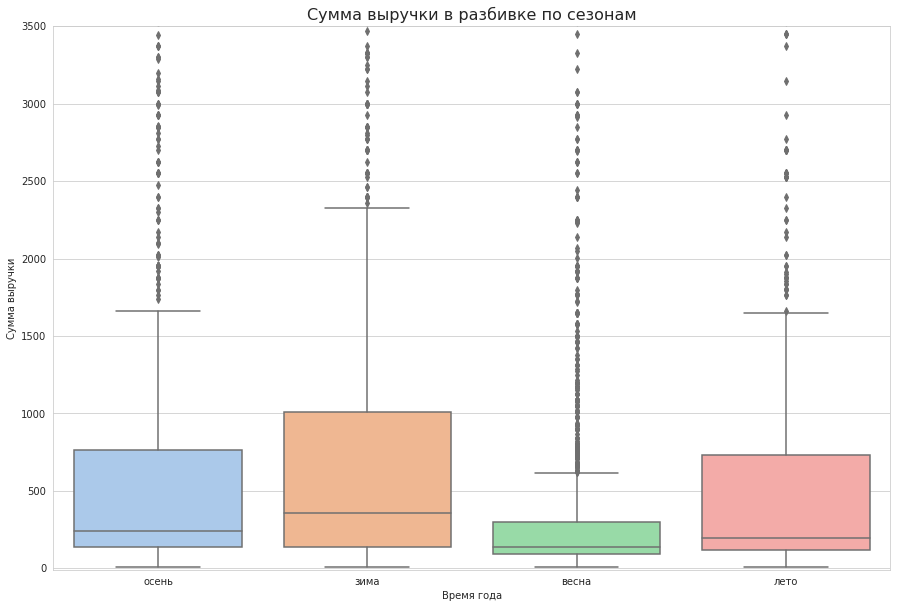

In [111]:
# построим график «ящик с усами» по сезонам
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.boxplot(x='season', y='total_price', data=df, palette='pastel').set_ylim(-10, 3500)
plt.title('Сумма выручки в разбивке по сезонам', fontsize=16)
plt.xlabel('Время года')
plt.ylabel('Сумма выручки')
plt.show()

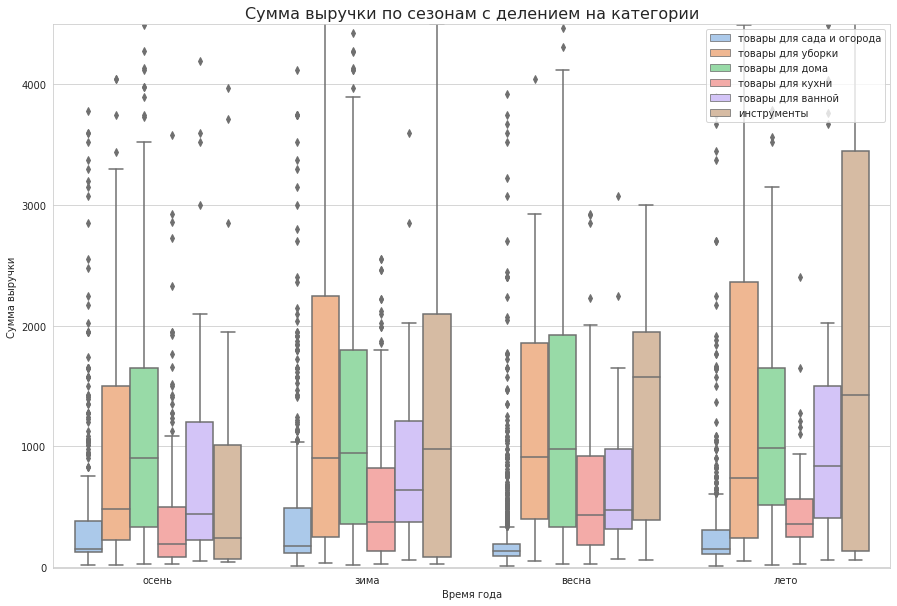

In [112]:
# построим график «ящик с усами» по выручке в разбивке по времени года.
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.boxplot(x='season', y='total_price', data=df, hue='category', palette='pastel').set_ylim(-10, 4500)
plt.title('Сумма выручки по сезонам с делением на категории', fontsize=16)
plt.legend(loc='upper right') 
plt.xlabel('Время года')
plt.ylabel('Сумма выручки')
plt.show()

Рассмотрим подробнее выручку по сезонам в каждой категории

In [113]:
# сделаем датасеты по категориям
garden_category = df.query('category == "товары для сада и огорода"')
house_category = df.query('category == "товары для дома"')
kitchen_category = df.query('category == "товары для кухни"')
bathroom_category = df.query('category == "товары для ванной"')
cleaning_category = df.query('category == "товары для уборки"')
tools_category = df.query('category == "инструменты"')

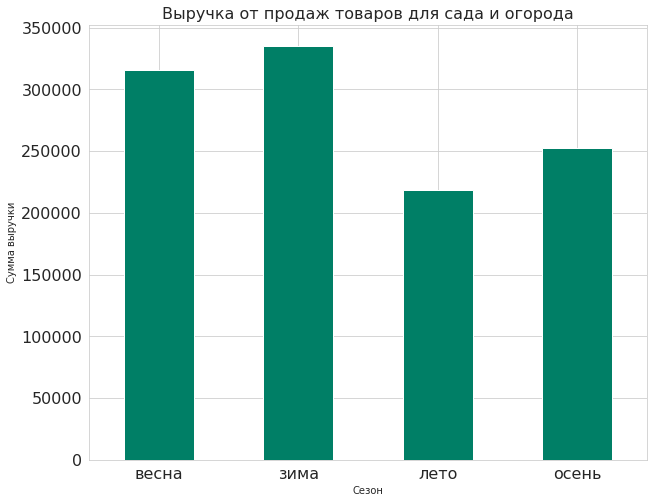

In [114]:
# график выручки от продаж товаров для сада и огорода
garden_category.groupby(['season']).agg({'total_price': 'sum'})\
                .plot(kind='bar', y=['total_price'], figsize=(10,8), grid=True, color='#007f66', fontsize=16, legend=False)
plt.title('Выручка от продаж товаров для сада и огорода', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

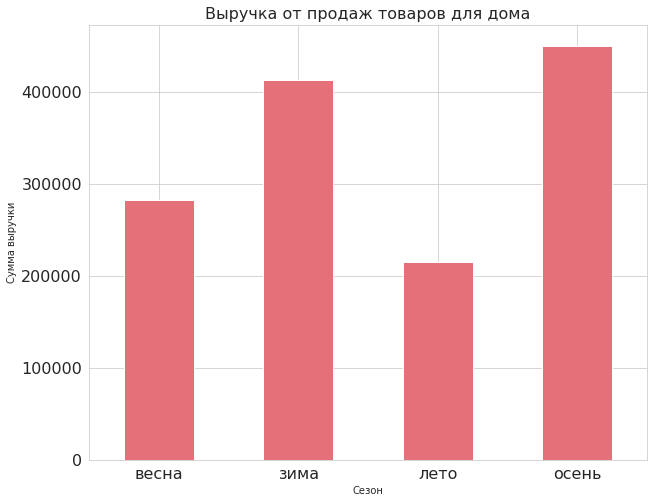

In [115]:
#график выручки от продаж товаров для дома
house_category.groupby(['season']).agg({'total_price': 'sum'})\
                .plot(kind='bar', y=['total_price'], figsize=(10,8), grid=True, color='#e4717a', fontsize=16, legend=False)        
plt.title('Выручка от продаж товаров для дома', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

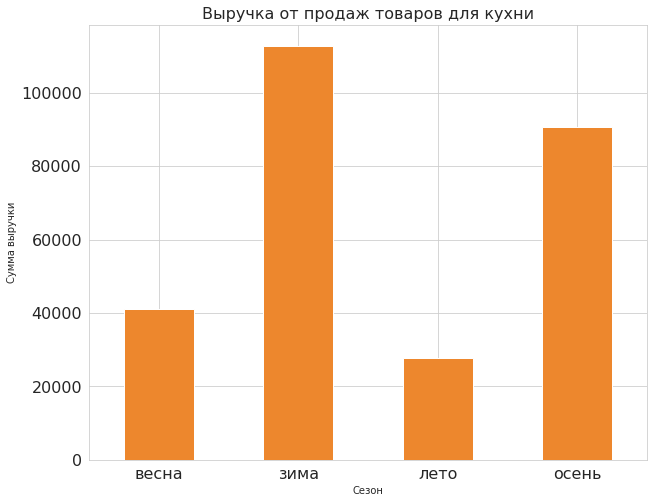

In [116]:
#график выручки от продаж товаров для кухни
kitchen_category.groupby(['season']).agg({'total_price': 'sum'})\
                .plot(kind='bar', y=['total_price'], figsize=(10,8), grid=True, color='#ed872d', fontsize=16, legend=False)        
plt.title('Выручка от продаж товаров для кухни', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

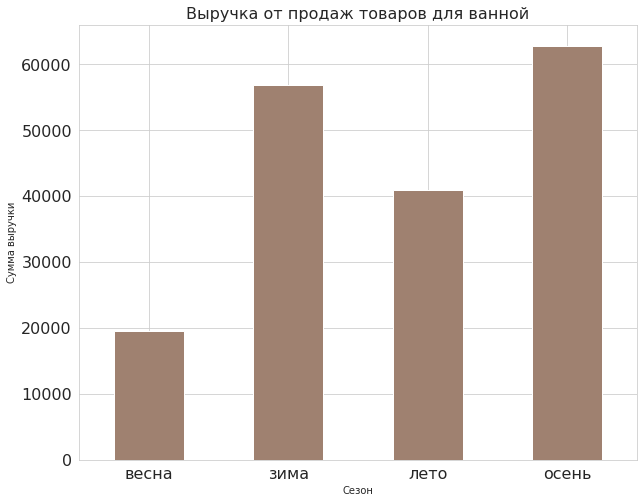

In [117]:
#график выручки от продаж товаров для ванной
bathroom_category.groupby(['season']).agg({'total_price': 'sum'})\
                .plot(kind='bar', y=['total_price'], figsize=(10,8), grid=True, color='#9f8170', fontsize=16, legend=False)        
plt.title('Выручка от продаж товаров для ванной', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

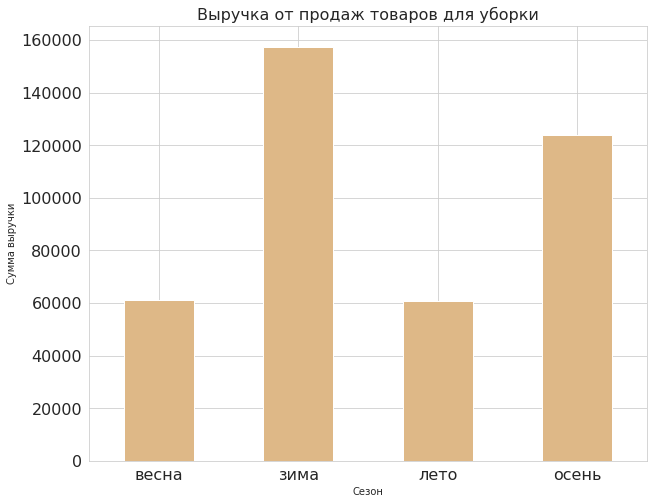

In [118]:
#график выручки от продаж товаров для уборки
cleaning_category.groupby(['season']).agg({'total_price': 'sum'})\
                .plot(kind='bar', y=['total_price'], figsize=(10,8), grid=True, color='#deb887', fontsize=16, legend=False)        
plt.title('Выручка от продаж товаров для уборки', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

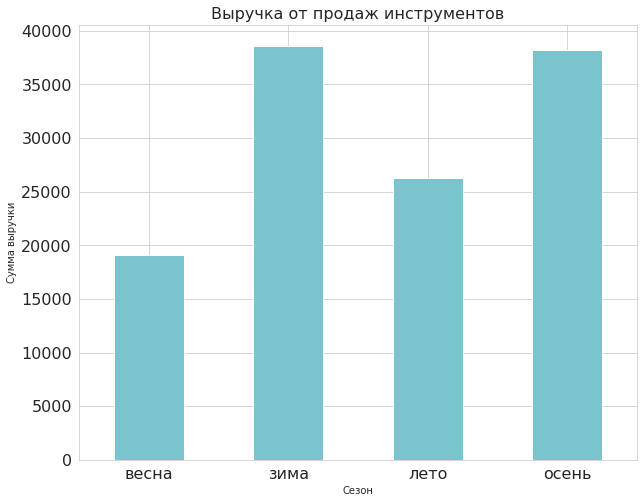

In [119]:
#график выручки от продаж инструментов
tools_category.groupby(['season']).agg({'total_price': 'sum'})\
                .plot(kind='bar', y=['total_price'], figsize=(10,8), grid=True, color='#7ac5cd', fontsize=16, legend=False)        
plt.title('Выручка от продаж инструментов', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

**Вывод**

- Анализ выручки по сезонам показал, что наиболее прибыльные сезоны - это осень и зима. Наименьшую прибыль магазин получает весной;
- Товары для сада и огорода лучше продаются зимой и весной, что можно объяснить подготовкой к летнему сезону;
- Наибольшая выручка от категории товаров для дома, для ванной и для кухни зимой и осенью;
- Сезон наибольшей выручки для товаров для уборки - зима;
- Инструменты летом приосят самую большую выручку по сравнению с другими категориями.


## Проверка гипотез

#### Сравнение категорий товаров по сумме выручки

In [120]:
#создадим функцию для подсчета p-value, используем созданные раннее датафремы по категориям

def test_group(df, column):
     
#рассчитаем p-value
    garden_house_pvalue = st.mannwhitneyu(garden_category[column], house_category[column])[1]
    
    garden_kitchen_pvalue = st.mannwhitneyu(garden_category[column], kitchen_category[column])[1]
    
    garden_bathroom_pvalue = st.mannwhitneyu(garden_category[column], bathroom_category[column])[1]
    
    garden_cleaning_pvalue = st.mannwhitneyu(garden_category[column], cleaning_category[column])[1]
        
    garden_tools_pvalue = st.mannwhitneyu(garden_category[column], tools_category[column])[1]

    
    house_kitchen_pvalue = st.mannwhitneyu(house_category[column], kitchen_category[column])[1]
        
    house_bathroom_pvalue = st.mannwhitneyu(house_category[column], bathroom_category[column])[1]
    
    house_cleaning_pvalue = st.mannwhitneyu(house_category[column], cleaning_category[column])[1] 
        
    house_tools_pvalue = st.mannwhitneyu(house_category[column], tools_category[column])[1]
    
    
    kitchen_bathroom_pvalue = st.mannwhitneyu(kitchen_category[column], bathroom_category[column])[1]
    
    kitchen_cleaning_pvalue = st.mannwhitneyu(kitchen_category[column], cleaning_category[column])[1]
        
    kitchen_tools_pvalue = st.mannwhitneyu(kitchen_category[column], tools_category[column])[1]
    
    
    bathroom_cleaning_pvalue = st.mannwhitneyu(bathroom_category[column], cleaning_category[column])[1] 
        
    bathroom_tools_pvalue = st.mannwhitneyu(bathroom_category[column], tools_category[column])[1]
    
    
    cleaning_tools_pvalue = st.mannwhitneyu(cleaning_category[column], tools_category[column])[1]
    
    # построим сводную таблицы 
    test_group = pd.DataFrame({'groups_tested': ['Товары для сада и огорода и Товары для дома', 
                                                  'Товары для сада и огорода и Товары для кухни',
                                                  'Товары для сада и огорода и Товары для ванной', 
                                                  'Товары для сада и огорода и Товары для уборки',
                                                  'Товары для сада и огорода и Инструменты',
                                                  'Товары для дома и Товары для кухни',
                                                  'Товары для дома и Товары для ванной', 
                                                  'Товары для дома и Товары для уборки',
                                                  'Товары для дома и Инструменты',
                                                  'Товары для кухни и Товары для ванной', 
                                                  'Товары для кухни и Товары для уборки',
                                                  'Товары для кухни и Инструменты',
                                                  'Товары для ванной и Товары для уборки',
                                                  'Товары для ванной и Инструменты',
                                                  'Товары для уборки и Инструменты'],
                                'p-value': [garden_house_pvalue, garden_kitchen_pvalue, garden_bathroom_pvalue, 
                                            garden_cleaning_pvalue, garden_tools_pvalue, house_kitchen_pvalue, 
                                            house_bathroom_pvalue, house_cleaning_pvalue, house_tools_pvalue,
                                            kitchen_bathroom_pvalue, kitchen_cleaning_pvalue, kitchen_tools_pvalue, 
                                            bathroom_cleaning_pvalue, bathroom_tools_pvalue, cleaning_tools_pvalue]})
    test_group['p-value'] = round(test_group['p-value'],5)
    test_group = test_group.set_index('groups_tested')
    return test_group

Сформулируем гипотезы:

- H₀: Выручка по различным категориям товаров не различается между собой;

- H₁: Между выручкой от товаров в разных категориях есть существенные различия.

За критический уровень статистической значимости возьмем значение **α = 0.05**

Нулевая гипотеза будет отвергнута, если значение p-value будет меньше α 

In [121]:
test_group(df, 'total_price')

,p-value
groups_tested,
Товары для сада и огорода и Товары для дома,0.00000
Товары для сада и огорода и Товары для кухни,0.00000
Товары для сада и огорода и Товары для ванной,0.00000
Товары для сада и огорода и Товары для уборки,0.00000
Товары для сада и огорода и Инструменты,0.00000
Товары для дома и Товары для кухни,0.00000
Товары для дома и Товары для ванной,0.00010
Товары для дома и Товары для уборки,0.07792
Товары для дома и Инструменты,0.01695


Тест показал, что статистически значимое различие в выручке отсуствует между категориями товаров:
- Товары для дома и Товары для уборки;
- Товары для ванной и Товары для уборки;
- Товары для ванной и Инструменты;
- Товары для уборки и Инструменты.

В остальных случаях между выручкой от товаров в разных категориях есть существенные различия.

#### Сравнение выручки от продаж по сезонам

Сформулируем гипотезы:

- H₀: Выручка по сезонам не различается между собой;

- H₁: Между выручкой по сезонам есть существенные различия.

In [122]:
# сделаем датасеты по категориям
winter = df.query('season == "зима"')
autumn = df.query('season == "осень"')
summer = df.query('season == "лето"')
spring = df.query('season == "весна"')

In [123]:

def test_season(df, column):
     
#рассчитаем p-value
    winter_autumn_pvalue = st.mannwhitneyu(winter[column], autumn[column])[1]
    
    winter_summer_pvalue = st.mannwhitneyu(winter[column], summer[column])[1]
    
    winter_spring_pvalue = st.mannwhitneyu(winter[column], spring[column])[1]
    
    autumn_summer_pvalue = st.mannwhitneyu(autumn[column], summer[column])[1]
        
    autumn_spring_pvalue = st.mannwhitneyu(autumn[column], spring[column])[1]

    summer_spring_pvalue = st.mannwhitneyu(summer[column], spring[column])[1]
        
    # построим сводную таблицы 
    test_season = pd.DataFrame({'groups_tested': ['Зима и Осень', 
                                                 'Зима и Лето',
                                                 'Зима и Весна',
                                                 'Осень и Лето',
                                                 'Осень и Весна',
                                                 'Весна и Лето'],
                                'p-value': [winter_autumn_pvalue, winter_summer_pvalue, winter_spring_pvalue, 
                                            autumn_summer_pvalue, autumn_spring_pvalue, summer_spring_pvalue]})
    test_season['p-value'] = round(test_season['p-value'],5)
    test_season = test_season.set_index('groups_tested')
    return test_season

In [124]:
test_season(df, 'total_price')

,p-value
groups_tested,
Зима и Осень,0.00487
Зима и Лето,0.00076
Зима и Весна,0.00000
Осень и Лето,0.26801
Осень и Весна,0.00000
Весна и Лето,0.00000


Таким образом, выручка от продаж товаров не имеет существенных различий только осенью и летом, в остальных случаях мы отвергаем нулевую гипотезу.

#### Сравнение продаж  в будни и выходные

Сформулируем гипотезы:

- H₀: Средние объёмы продаж в будни и выходные одинаковые.
- H₁: Средние объёмы продаж в будни и выходные разные.


In [125]:
# сформируем две независимые выборки
sales_weekdays = df[df['weekdays']==1]['total_price']
sales_weekends = df[df['weekends']==1]['total_price']

In [126]:
# используем метод ttest_ind для двух независимых выборок
alpha = 0.05

results = st.ttest_ind(sales_weekdays, sales_weekends) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08411216950170397
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

В ходе анализа мы проанализировали данные о транзакциях интернет-магазина «Пока все ещё тут». Данные были предоставлены за период с 1 ноября 2018 года по 31 января 2020 года.

Была осуществлена предобработка данных, в результате которой:
- Были удалены неявные дубликаты;
- Столбец date приведен к типу datetime;
- Были добавлены стлобцы total_price, order_date, hour, day, week, month, year, weekdays, weekends, season;
- В столбце quantity были удалены аномально большие значения в количестве товара;
- В столбце customer_id были удалены аномальные покупатели.


Мы исследовали 2377 покупателей, которые совершили 3263 заказа.


**В результате анализа были сделаны следующие выводы:**

*1. Показатели пользовательской активности*

- Среднее количество уникальных покупателей за день: 6 человек
- Среднее количество уникальных покупателей за неделю: 45 человек
- Среднее количество уникальных покупателей за месяц: 196 человек
- Недельная аудитория интернет-магазина: 14,6 %;
- Месячная аудитория интернет-магазина: 3.4 %.
- В начале 2019 г. происходит падение пользовательской активности, затем рост с февраля по май и снова падение в июне 2019 г. К концу 2019 г. пользователская активность снова идет вверх.


*2. Анализ средних значений*

- Покупатели, как правило, совершают разовые покупки и по одному наименованию товара в количестве 1-3 штуки;
- Средняя выручка с одного покупателя составляет 824 у.е.;
- Средняя сумма заказа: 637 у.е.;
- Средняя стоимость продукта в заказе: 351 у.е.


*3. Изменение количества заказов во времени*

- Наибольшая сумма выручки у магазина отмечается во вторник в 13:00;
- Период с наибольшей выручкой длится с октября по декабрь;
- Покупатели, как правило, оформляют заказы с 8:00 до 22:00, пик приходится на 13:00-14:00, после 23:00 совершают покупки крайне редко;
- Покупки чаще совершаются в первой половине недели, реже на выходных;
- Самые активные месяцы - апрель/май, люди делают покупки для сада-огорода перед летним сезоном. С июня по сентябрь спрос минимален. Показатели спроса в октябре-ноябре 2018 г. были выше почти в два раза, чем показатели 2019 года;
- Месяца с наибольшей выручкой в 2019 г. - февраль и апрель, с наименьшей - сентябрь и ноябрь. Выручка с октября по декабрь в 2018 г. была выше по сравнению в 2019 годом.


*4. Категоризация товарного ассортимента*
- Всего в датасете 2243 уникальных продукта.

В ходе анализа было выделено 6 категорий товаров:

         - Товары для сада и огорода;
         - Товары для дома;
         - Товары для кухни;
         - Товары для уборки;
         - Товары для ванной;            
         - Инструменты.  
         
- Основную долю товарного ассортимента магазина составляют товары категории «сад и огород» - 45.3%, товары для дома составляют 25.7% ассортимента, товары для кухни - 12.2%, товары для уборки - 8.5%, товары для ванной - 5.5%, наименьшее количество ассортимента составляют инструменты - 2.7%
- В категории «товары для сада и огорода» самый продаваемый товар: пеларгония розебудная red pandora;
- В категории «товары для дома» самый продаваемый товар: сумка-тележка 2-х колесная gimi argo синяя;
- В категории « товары для кухни» самый продаваемый товар: муляж яблоко, оранжевый, 8,5 см;
- В категории «товары для уборки» самый продаваемый товар: таз пластмассовый со стиральной доской;
- В категории « товары для ванной» самый продаваемый товар: ерш унитазный с деревянной ручкой;
- В категории «инструменты» самый продаваемый товар: стяжка оконная с болтом ст-55 цинк.


*5. ABC-анализ товаров*

- Товары категорий AA, AB, ВA основные товары для магазина, с которыми стоит активно работать и всегда держать их на складе;
- Товары категорий ВВ, CA, АС уверенный "середнячок" отнесем их к дополнительным товарам;
- Товары категорий BC, CB являются наименее ценными для магазина, товар, попавший в категорию СС рекомендуется к выводу из ассортимента.


В большем количестве продаются товары категории "СА", на втором месте категория "ВА". Примерно в одинаковом количестве продаются товары в группах "АВ", "ВВ", "АА". В малом количестве продаются товары категории "АС".

Некоторые товары категорий "AA, AB, ВA", которые пользуются спросом и важны для магазина:

     - сушилка для белья напольная ника;
     - тележка багажная delta;
     - сушилка для белья потолочная лиана; 
     - хлебница деревянная (бук);
     - сумка-тележка 2-х колесная gimi argo;
     - пеларгония розебудная.
     
     
Некоторые товары категорий "BC, CB, CC", которые являются наименее ценными для магазина и могут быть рекомендованы к выводу из ассортимента:

     - львиный зев волшебный ковер;
     - сушилка для белья настенная zalger prima;
     - петуния простая рассада;
     - гладильная доска ника дсп эконом;
     - сушилка для белья лиана люкс 130 см потолочная;
     - подрукавник складной ника;
     - муляж желудь;
     - петуния potunia plus purple;
     - многолетнее растение тимьян-чабрец.
     
     
*6. Анализ выручки и среднего чека*

- Общая сумма выручки: 3461375.42 у.е.;
- По общей сумме выручки наиболее прибыльная категория — это «товары для дома», после следует категория «товары для сада и огорода». Наименьшую выручку магазин получает в категории инструменты;
- Самое большое количество продаваемых товаров в категории «товары для сада и огорода». Товары этой категории составляют основной ассортимент магазаина;
- Самый высокий средний чек в категории «товары для дома», на втором месте «товары для уборки»;
- В категории «товары для кухни» самый низкий средний чек. 


*7. Кумулятивная выручка по категориям товаров и кумулятивный средний чек*


- По кумулятивной выручке самой доходной для магазина категорией является "товары для дома", на втором месте "товары для сада и огорода". Примерно одинаковый доход приносят категории "товары для уборки" и "товары для кухни". Самой неприбыльной категорией по кумулятивной выручке является категория "инструменты";
- Товары для дома по кумулятивному среднему чеку опережали остальные категории до февраля 2019 года;
- Средний чек товаров для уборки стал выше остальных категорий с марта 2019 года;
- Средний чек категории инструменты имел рост до февраля 2019 г., потом пошел вниз;
- Кумулятивный средний чек товаров для сада и огорода уменьшантся после мая 2019 года, что можно связать с сезонностью товаров;
- Средний чек товаров для кухни оставался низким и не менялся на протяжении практически всего периода.


*8. Сезонность продажи товаров*
- Анализ выручки по сезонам показал, что наиболее прибыльные сезоны - это осень и зима. Наименьшую прибыль магазин получает весной;
- Товары для сада и огорода лучше продаются зимой и весной, что можно объяснить подготовкой к летнему сезону;
- Наибольшая выручка от категории товаров для дома, для ванной и для кухни зимой и осенью;
- Сезон наибольшей выручки для товаров для уборки - зима;
- Инструменты летом приосят самую большую выручку по сравнению с другими категориями.


*9. Проверка гипотез*

1. Было проведено сравнение категорий товаров по сумме выручки. Тест показал, что во всех категориях есть существенные различия от выручки товаров, кроме следующих категорий:
       - Товары для дома и Товары для уборки;
       - Товары для ванной и Товары для уборки;
       - Товары для ванной и Инструменты;
       - Товары для уборки и Инструменты.
       
2. Было проведено сравнение выручки от продаж по сезонам. Тест показал, что выручка от продаж товаров не имеет существенных различий только осенью и летом, в остальных случаях нулевая гипотеза была нами отвергнута.

3. Было проведено сравнение продаж в будни и выходные. Тест показал, что средние объёмы продаж в будни и выходные примерно одинаковые.

**Рекомендации**

- Для увеличения низких чеков, рекомендуется обратить внимание на скидки и сезонные распродажи для товаров, находящихся в ценовой категории до 1000 у.е;
- Привлекать больше покупателей, которые делают покупки в категории "товары для дома", т.к. они являются основным доходным сегментов интернет-магазина. Возможно, проводить промоакции, предлагать выгодные предложения и другие маркентинговые мероприятия;
- Учитывать товарный ассортимент в разные сезоны. Так, самые прибыльные сезоны - это осень и зима. Наименьшую прибыль магазин получает весной. Товары для сада и огорода лучше продаются весной. Наибольшая выручка от категории товаров для дома, для ванной и для кухни зимой и осенью. Сезон наибольшей выручки для товаров для уборки - зима;
- В зависимости от сезона, предлагать актуальные предложения внутри товарной категории;
- Стимулировать регулярные заказы, например, ввести накопительные скидки или купоны, дающие скидку на следующую покупку
- Рассмотреть вопрос вывода из товарного ассортимента товаров, которые в рамках АВС-анализа были отнесены к категориям  "BC, CB, CC".


